# House Sales Price Prediction
#### An Advnaced Regression Problem

Eeshan Gupta  
eeshangpt@gmail.com

## Table of Content
1. [Introduction to the problem]()
    1. [Business Understanding]()
    2. [Business Goal]()
1. [Reading and Cleaning the Data]()
    1. [Data Dictionary]()
    2. [Missing Value Analysis]()
    3. [Cleaning the Data]()
        4. [Features]()
        5. [Target Variables]()
1. [Exploratory Data Analysis]()
    1. [Numerical Variables]()
    2. [Categorical Variables]()
    3. [Data Preparation]()
1. [Data Preparation for Model Training]()
    1. [Train-Test Split]()
    2. [Scaling the Data]()
1. [Linear Regression Model]()
1. [Ridge and Lasso Regression]()
    1. [Parameters]()
    2. [Ridge Regression]()
    3. [Lasso Regression]()
1. <>
    1. rkld;f
1. <>
    1. rkld;f

## Introduction to the problem
### Business Understanding

* A US-based housing company named Surprise Housing has decided to enter the Australian market
* The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price
* For the same purpose, the company has collected a data set from the sale of houses in Australia

### Business Goal

* Which variables are significant in predicting the price of a house
* How well those variables describe the price of a house

Imports and Standard Settings

In [1]:
import warnings
from os import getcwd
from os.path import join
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, Normalizer

In [2]:
np.random.seed(42)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)
sns.set_style('darkgrid')

In [3]:
PRJ_DIR = getcwd()
DATA_DIR = join(PRJ_DIR, "data")

## Reading and Cleaning the Data

In [4]:
df = pd.read_csv(join(DATA_DIR, "train.csv"))
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Dictionary

In [6]:
def get_data_dictionary():    
    with open(join(DATA_DIR, "data_description.txt"), 'r') as f:
        a = f.readlines()
    
    data_dict = {}
    for itr, line in enumerate(a):
        _ = line.split(' ')
        if _[0] not in ['', '\n']:
            column_name = _[0].split(':')[0]
            data_dict[column_name] = {"meaning" : [], "categories":{}}
            meaning = " ".join(_[1:]).strip()
            data_dict[column_name]["meaning"] = meaning
        elif _[0] == '\n':
            continue
        elif _[0] == '':
            line = " ".join([i for i in _ if i != ''])
            temp = line.strip().split("\t")
            if len(temp) > 1:
                cat_name, cat_meaning = temp[0], temp[1]
            data_dict[column_name]['categories'][cat_name] = cat_meaning
    data_dict = {k: v for k, v in data_dict.items() if v['meaning'] != ''}
    
    numerical_columns, categorical_columns = [], []
    for (k, v) in data_dict.items():
        if v['meaning'] != '':
            if len(v['categories']) == 0:
                numerical_columns.append(k)
            if len(v['categories']) > 0:
                categorical_columns.append(k)
    pprint(data_dict)
    return categorical_columns, numerical_columns, data_dict

In [7]:
categorical_columns, numerical_columns, _ = get_data_dictionary()

{'1stFlrSF': {'categories': {'Mix': 'Mixed'},
              'meaning': 'First Floor square feet'},
 '2ndFlrSF': {'categories': {}, 'meaning': 'Second floor square feet'},
 '3SsnPorch': {'categories': {},
               'meaning': 'Three season porch area in square feet'},
 'Alley': {'categories': {'Grvl': 'Gravel',
                          'NA ': 'No alley access',
                          'Pave': 'Paved'},
           'meaning': 'Type of alley access to property'},
 'Bedroom': {'categories': {},
             'meaning': 'Bedrooms above grade (does NOT include basement '
                        'bedrooms)'},
 'BldgType': {'categories': {}, 'meaning': 'Type of dwelling'},
 'BsmtCond': {'categories': {'Ex': 'Excellent',
                             'Fa': 'Fair - dampness or some cracking or '
                                   'settling',
                             'Gd': 'Good',
                             'NA': 'No Basement',
                             'Po': 'Poor - Severe cracking

### Missing Value Analysis

In [8]:
(df.isna().sum(axis=0) > 0).sum()

19

Removing columns with any missing values

In [9]:
empty_columns = df.columns[(df.isna().sum(axis=0))>0]
df = df[[i for i in df.columns if i not in empty_columns]]
df.shape

(1460, 62)

In [10]:
all_unique_columns = df.columns[df.nunique() == df.shape[0]]

In [11]:
df = df[[i for i in df.columns if i not in all_unique_columns]]

In [12]:
df.shape

(1460, 61)

In [13]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null

### Cleaning the data

In [15]:
X = df.copy()
Y = X.pop('SalePrice').astype(float)

#### Feature Variables

In [16]:
date_columns = ["YearBuilt", "YearRemodAdd", "YrSold", "MoSold", "MSSubClass",]

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null

In [18]:
categorical_columns = [i for i in X.columns if i in categorical_columns]
numerical_columns = [i for i in X.columns if i in numerical_columns]
other_columns = [i for i in X.columns if i not in numerical_columns + categorical_columns]

Columns not present in the data dictionary

In [19]:
X[other_columns].nunique()

BedroomAbvGr    8
KitchenAbvGr    4
dtype: int64

In [20]:
for _ in other_columns:
    print(_, X[_].unique(), sep='\n', end='\n==\n')

BedroomAbvGr
[3 4 1 2 0 5 6 8]
==
KitchenAbvGr
[1 2 3 0]
==


Since the total number of unique values are quite low, therefore deeming them to be categorical variables

In [21]:
categorical_columns += other_columns
del other_columns

Adding date type columns to categorical variables

In [22]:
categorical_columns += date_columns

Defining the categorical and numerical columns

In [23]:
categorical_columns = list(set(categorical_columns))
numerical_columns = list(set([i for i in numerical_columns if i not in date_columns]))

Cleaning the date type and creating the age

In [24]:
date_columns = date_columns[:-1]

month_dict = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec',
}

X['MoSold'] = X.MoSold.astype(int).apply(lambda x: month_dict[x]).astype(str)
X['BuiltAge'] = (2023 - X.YearBuilt.astype(int))
X['LastRemod'] = (2023 - X.YearRemodAdd.astype(int))
X['LastSold'] = (2023 - X.YrSold.astype(int))

for i in ["YearBuilt", "YearRemodAdd", "YrSold",]:
    categorical_columns.remove(i)

numerical_columns += ['BuiltAge', 'LastRemod', 'LastSold']
del date_columns

In [25]:
X[numerical_columns].describe()

,WoodDeckSF,Fireplaces,BsmtUnfSF,MiscVal,OpenPorchSF,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtFinSF2,2ndFlrSF,EnclosedPorch,LotArea,3SsnPorch,GarageCars,GarageArea,LowQualFinSF,BsmtHalfBath,PoolArea,BsmtFinSF1,TotRmsAbvGrd,FullBath,HalfBath,ScreenPorch,BuiltAge,LastRemod,LastSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,94.244521,0.613014,567.240411,43.489041,46.660274,1057.429452,1515.463699,0.425342,46.549315,346.992466,21.954110,10516.828082,3.409589,1.767123,472.980137,5.844521,0.057534,2.758904,443.639726,6.517808,1.565068,0.382877,15.060959,51.732192,38.134247,15.184247
std,125.338794,0.644666,441.866955,496.123024,66.256028,438.705324,525.480383,0.518911,161.319273,436.528436,61.119149,9981.264932,29.317331,0.747315,213.804841,48.623081,0.238753,40.177307,456.098091,1.625393,0.550916,0.502885,55.757415,30.202904,20.645407,1.328095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,13.000000,13.000000,13.000000
25%,0.000000,0.000000,223.000000,0.000000,0.000000,795.750000,1129.500000,0.000000,0.000000,0.000000,0.000000,7553.500000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,23.000000,19.000000,14.000000
50%,0.000000,1.000000,477.500000,0.000000,25.000000,991.500000,1464.000000,0.000000,0.000000,0.000000,0.000000,9478.500000,0.000000,2.000000,480.000000,0.000000,0.000000,0.000000,383.500000,6.000000,2.000000,0.000000,0.000000,50.000000,29.000000,15.000000
75%,168.000000,1.000000,808.000000,0.000000,68.000000,1298.250000,1776.750000,1.000000,0.000000,728.000000,0.000000,11601.500000,0.000000,2.000000,576.000000,0.000000,0.000000,0.000000,712.250000,7.000000,2.000000,1.000000,0.000000,69.000000,56.000000,16.000000
max,857.000000,3.000000,2336.000000,15500.000000,547.000000,6110.000000,5642.000000,3.000000,1474.000000,2065.000000,552.000000,215245.000000,508.000000,4.000000,1418.000000,572.000000,2.000000,738.000000,5644.000000,14.000000,3.000000,2.000000,480.000000,151.000000,73.000000,17.000000


In [26]:
X[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WoodDeckSF     1460 non-null   int64 
 1   Fireplaces     1460 non-null   int64 
 2   BsmtUnfSF      1460 non-null   int64 
 3   MiscVal        1460 non-null   int64 
 4   OpenPorchSF    1460 non-null   int64 
 5   SaleType       1460 non-null   object
 6   TotalBsmtSF    1460 non-null   int64 
 7   GrLivArea      1460 non-null   int64 
 8   BsmtFullBath   1460 non-null   int64 
 9   BsmtFinSF2     1460 non-null   int64 
 10  2ndFlrSF       1460 non-null   int64 
 11  EnclosedPorch  1460 non-null   int64 
 12  LotArea        1460 non-null   int64 
 13  3SsnPorch      1460 non-null   int64 
 14  Utilities      1460 non-null   object
 15  BldgType       1460 non-null   object
 16  GarageCars     1460 non-null   int64 
 17  GarageArea     1460 non-null   int64 
 18  Condition1     1460 non-null

In [27]:
numerical_description = X[numerical_columns].describe()
other_categorical_columns = [i for i in numerical_columns if i not in numerical_description.columns]
numerical_columns = numerical_description.columns.to_list() + ['1stFlrSF']
categorical_columns += other_categorical_columns
categorical_columns.remove('1stFlrSF')
del other_categorical_columns
numerical_description

,WoodDeckSF,Fireplaces,BsmtUnfSF,MiscVal,OpenPorchSF,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtFinSF2,2ndFlrSF,EnclosedPorch,LotArea,3SsnPorch,GarageCars,GarageArea,LowQualFinSF,BsmtHalfBath,PoolArea,BsmtFinSF1,TotRmsAbvGrd,FullBath,HalfBath,ScreenPorch,BuiltAge,LastRemod,LastSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,94.244521,0.613014,567.240411,43.489041,46.660274,1057.429452,1515.463699,0.425342,46.549315,346.992466,21.954110,10516.828082,3.409589,1.767123,472.980137,5.844521,0.057534,2.758904,443.639726,6.517808,1.565068,0.382877,15.060959,51.732192,38.134247,15.184247
std,125.338794,0.644666,441.866955,496.123024,66.256028,438.705324,525.480383,0.518911,161.319273,436.528436,61.119149,9981.264932,29.317331,0.747315,213.804841,48.623081,0.238753,40.177307,456.098091,1.625393,0.550916,0.502885,55.757415,30.202904,20.645407,1.328095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,13.000000,13.000000,13.000000
25%,0.000000,0.000000,223.000000,0.000000,0.000000,795.750000,1129.500000,0.000000,0.000000,0.000000,0.000000,7553.500000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,23.000000,19.000000,14.000000
50%,0.000000,1.000000,477.500000,0.000000,25.000000,991.500000,1464.000000,0.000000,0.000000,0.000000,0.000000,9478.500000,0.000000,2.000000,480.000000,0.000000,0.000000,0.000000,383.500000,6.000000,2.000000,0.000000,0.000000,50.000000,29.000000,15.000000
75%,168.000000,1.000000,808.000000,0.000000,68.000000,1298.250000,1776.750000,1.000000,0.000000,728.000000,0.000000,11601.500000,0.000000,2.000000,576.000000,0.000000,0.000000,0.000000,712.250000,7.000000,2.000000,1.000000,0.000000,69.000000,56.000000,16.000000
max,857.000000,3.000000,2336.000000,15500.000000,547.000000,6110.000000,5642.000000,3.000000,1474.000000,2065.000000,552.000000,215245.000000,508.000000,4.000000,1418.000000,572.000000,2.000000,738.000000,5644.000000,14.000000,3.000000,2.000000,480.000000,151.000000,73.000000,17.000000


In [28]:
X[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   KitchenAbvGr   1460 non-null   int64 
 1   PavedDrive     1460 non-null   object
 2   Functional     1460 non-null   object
 3   MSSubClass     1460 non-null   int64 
 4   LotConfig      1460 non-null   object
 5   LandContour    1460 non-null   object
 6   HeatingQC      1460 non-null   object
 7   Exterior1st    1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   RoofMatl       1460 non-null   object
 10  LotShape       1460 non-null   object
 11  SaleCondition  1460 non-null   object
 12  MoSold         1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  KitchenQual    1460 non-null   object
 16  OverallCond    1460 non-null   int64 
 17  Exterior2nd    1460 non-null   object
 18  CentralAir     1460 non-null

In [29]:
X[categorical_columns] = X[categorical_columns].astype(str)
X[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   KitchenAbvGr   1460 non-null   object
 1   PavedDrive     1460 non-null   object
 2   Functional     1460 non-null   object
 3   MSSubClass     1460 non-null   object
 4   LotConfig      1460 non-null   object
 5   LandContour    1460 non-null   object
 6   HeatingQC      1460 non-null   object
 7   Exterior1st    1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   RoofMatl       1460 non-null   object
 10  LotShape       1460 non-null   object
 11  SaleCondition  1460 non-null   object
 12  MoSold         1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  OverallQual    1460 non-null   object
 15  KitchenQual    1460 non-null   object
 16  OverallCond    1460 non-null   object
 17  Exterior2nd    1460 non-null   object
 18  CentralAir     1460 non-null

In [30]:
X[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   WoodDeckSF     1460 non-null   int64
 1   Fireplaces     1460 non-null   int64
 2   BsmtUnfSF      1460 non-null   int64
 3   MiscVal        1460 non-null   int64
 4   OpenPorchSF    1460 non-null   int64
 5   TotalBsmtSF    1460 non-null   int64
 6   GrLivArea      1460 non-null   int64
 7   BsmtFullBath   1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   2ndFlrSF       1460 non-null   int64
 10  EnclosedPorch  1460 non-null   int64
 11  LotArea        1460 non-null   int64
 12  3SsnPorch      1460 non-null   int64
 13  GarageCars     1460 non-null   int64
 14  GarageArea     1460 non-null   int64
 15  LowQualFinSF   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  PoolArea       1460 non-null   int64
 18  BsmtFinSF1     1460 non-null   int64
 19  TotRms

#### Target Variables (Sales Price)

<Axes: xlabel='SalePrice', ylabel='Density'>

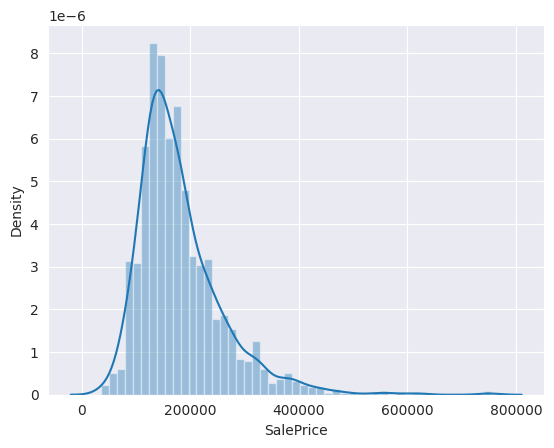

In [31]:
sns.distplot(Y)

The target varaiable is distributed normally but skewed. Taking log of the varaible removes the skewness in the distribution

<Axes: xlabel='SalePrice', ylabel='Density'>

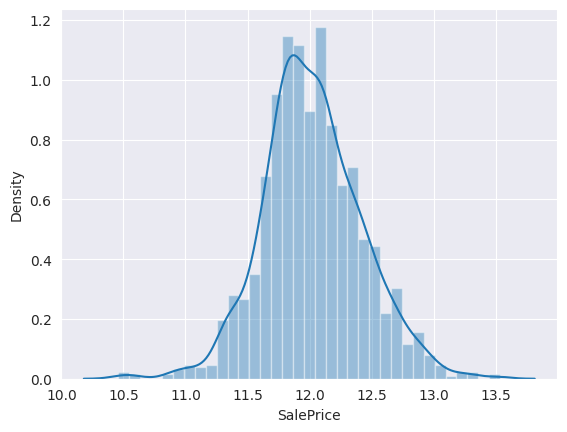

In [32]:
sns.distplot(np.log(Y))

## Exploratory Data Analysis
Defining target variable

In [33]:
Y_log = np.log(Y)

### Correlation with numerical variables

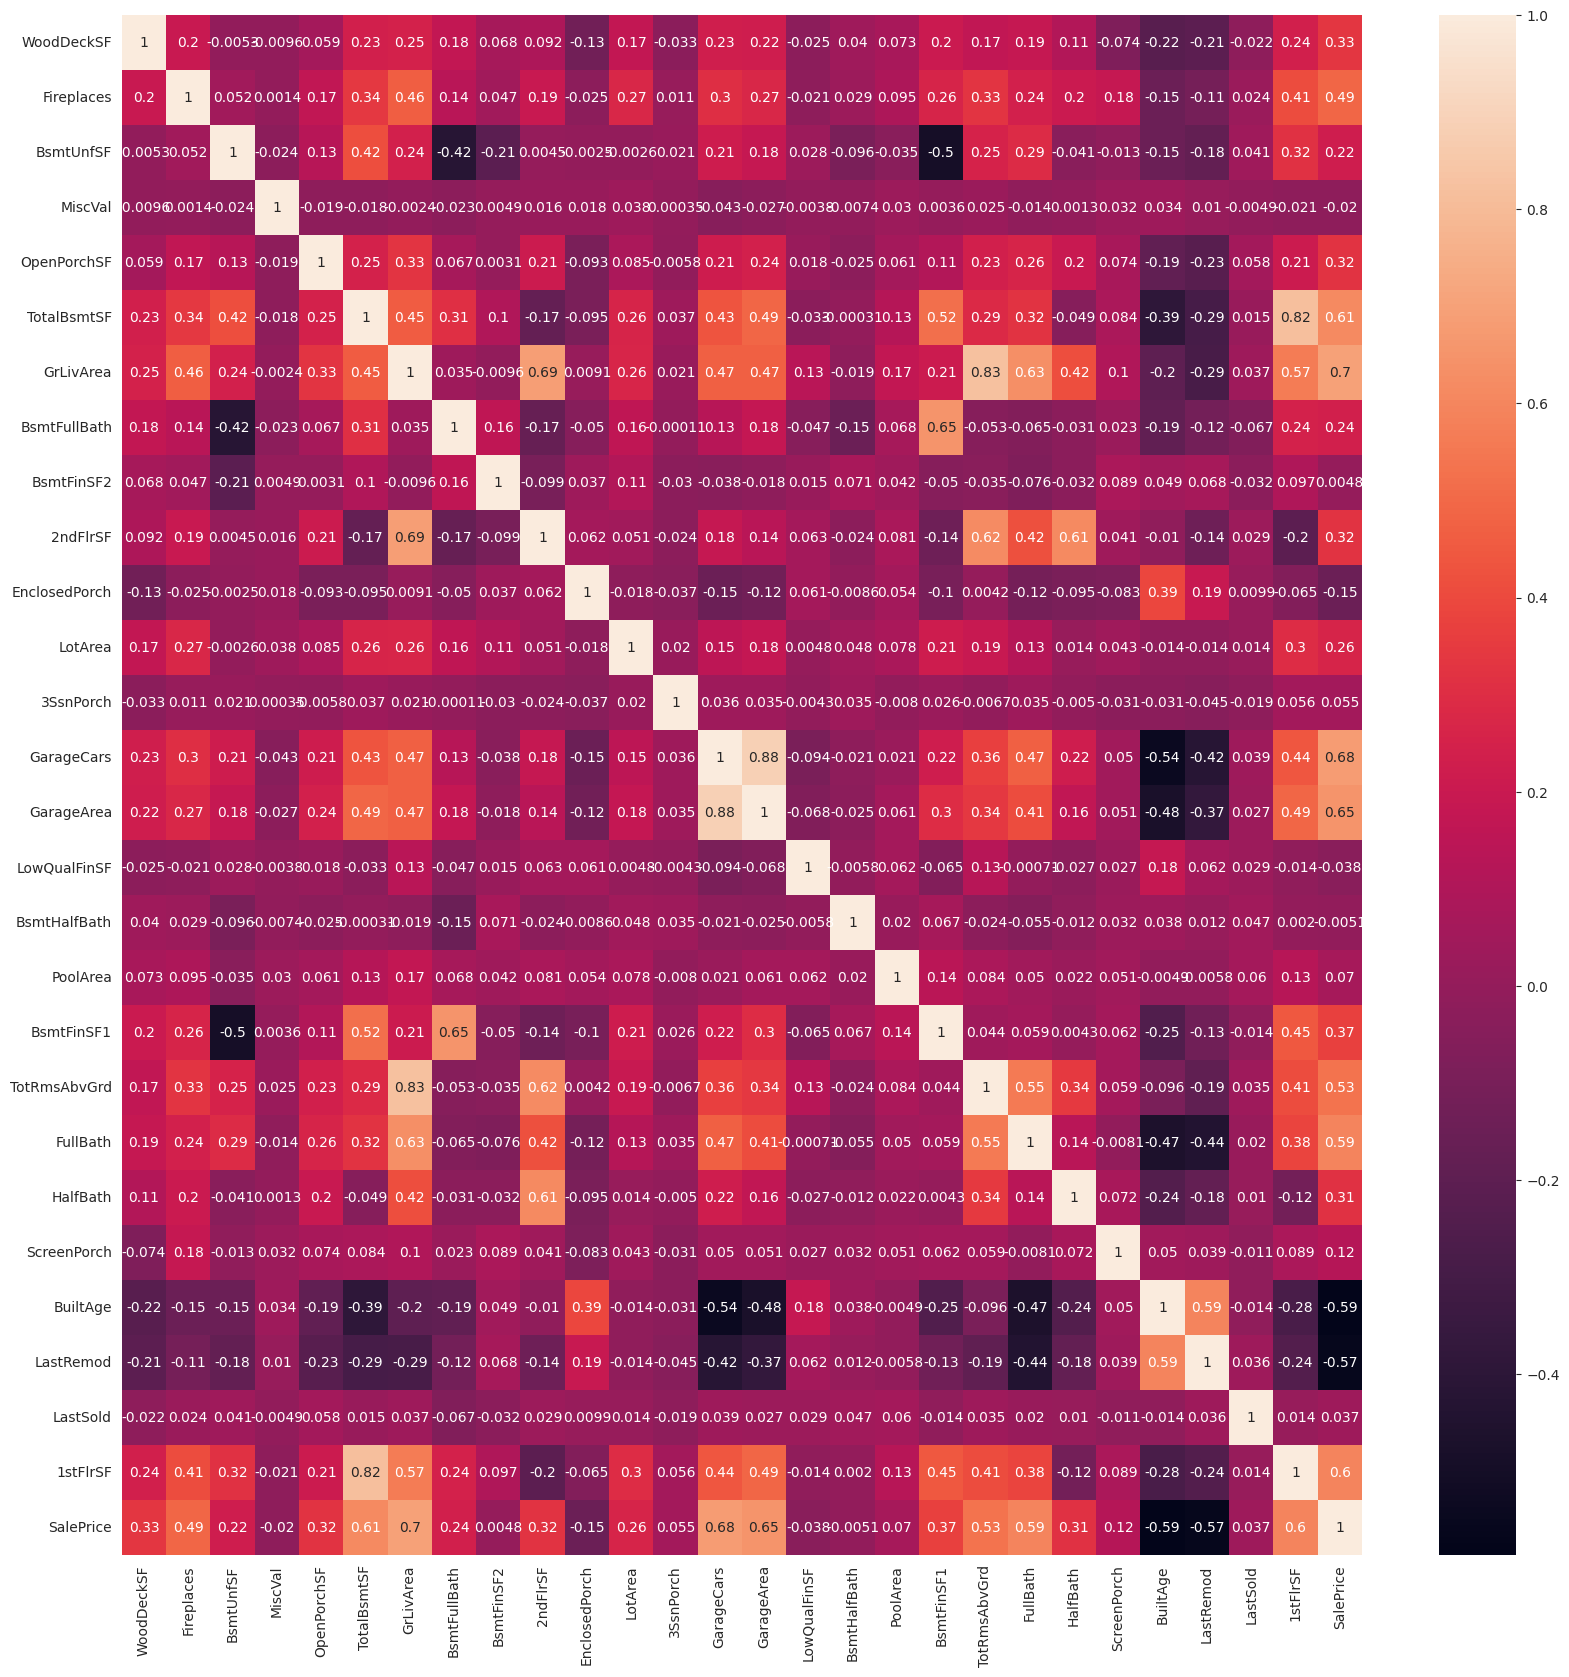

In [34]:
plt.figure(figsize=(20,20))
a = pd.concat((X[numerical_columns], Y_log), axis=1)
sns.heatmap(a.corr(), annot=True)
del a
plt.show()

Finding the correlation of numerical varibles with target variable

In [35]:
corr_salesprice = X[numerical_columns].corrwith(Y_log).sort_values(ascending=False).reset_index()
corr_salesprice.columns = ['col_name', 'corr_value']
corr_salesprice

,col_name,corr_value
0,GrLivArea,0.700927
1,GarageCars,0.680625
2,GarageArea,0.650888
3,TotalBsmtSF,0.612134
4,1stFlrSF,0.596981
5,FullBath,0.594771
6,TotRmsAbvGrd,0.534422
7,Fireplaces,0.489449
8,BsmtFinSF1,0.372023
9,WoodDeckSF,0.334135


In [36]:
highly_corr_columns = corr_salesprice[(corr_salesprice.corr_value >= 0.5) | (corr_salesprice.corr_value <= -0.5)]
highly_corr_columns

,col_name,corr_value
0,GrLivArea,0.700927
1,GarageCars,0.680625
2,GarageArea,0.650888
3,TotalBsmtSF,0.612134
4,1stFlrSF,0.596981
5,FullBath,0.594771
6,TotRmsAbvGrd,0.534422
25,LastRemod,-0.565608
26,BuiltAge,-0.586570


<Figure size 640x480 with 0 Axes>

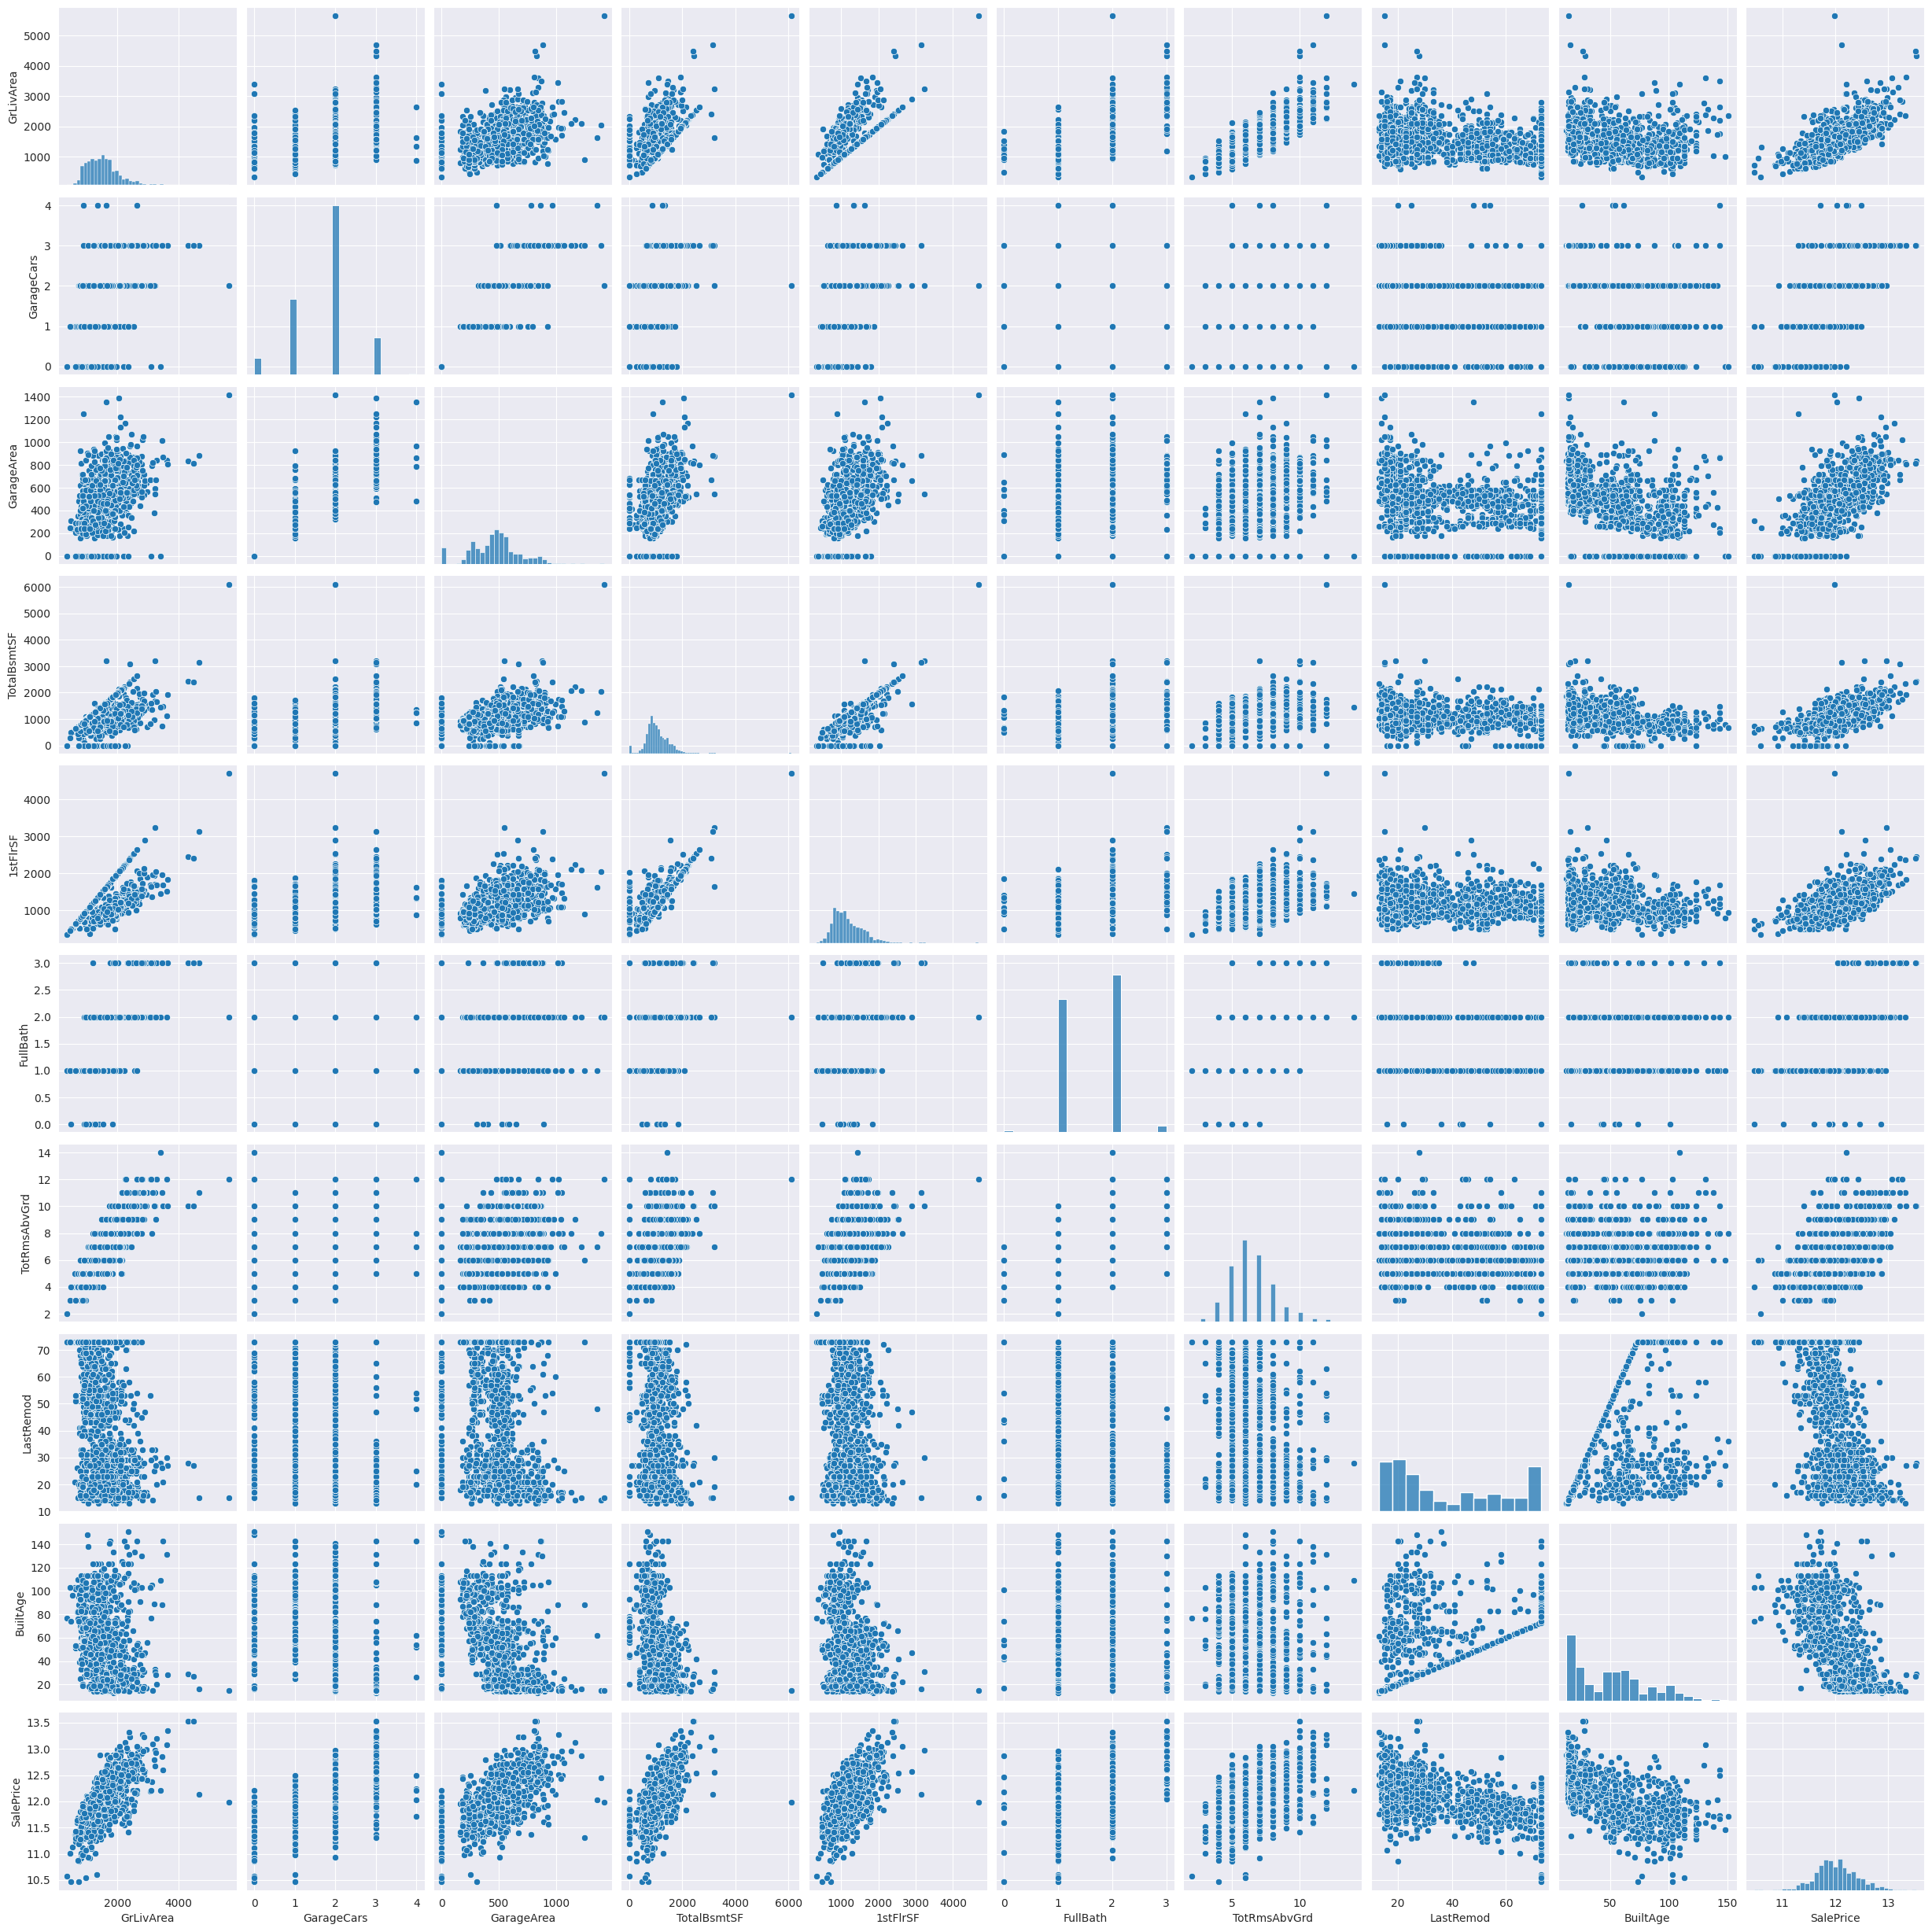

In [37]:
plt.figure()
a = pd.concat((X[highly_corr_columns.col_name], Y_log), axis=1)
sns.pairplot(data=a)
del a
plt.show()

### Bivariate Analysis of categorical variable with target variable

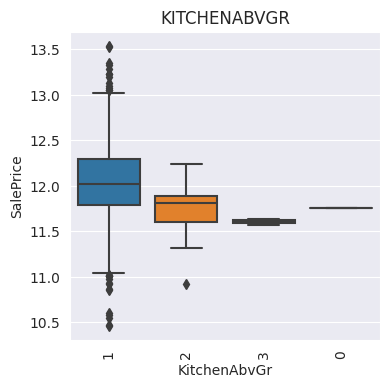

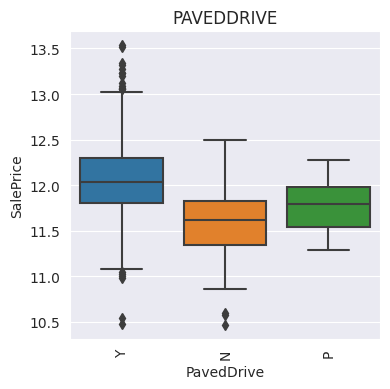

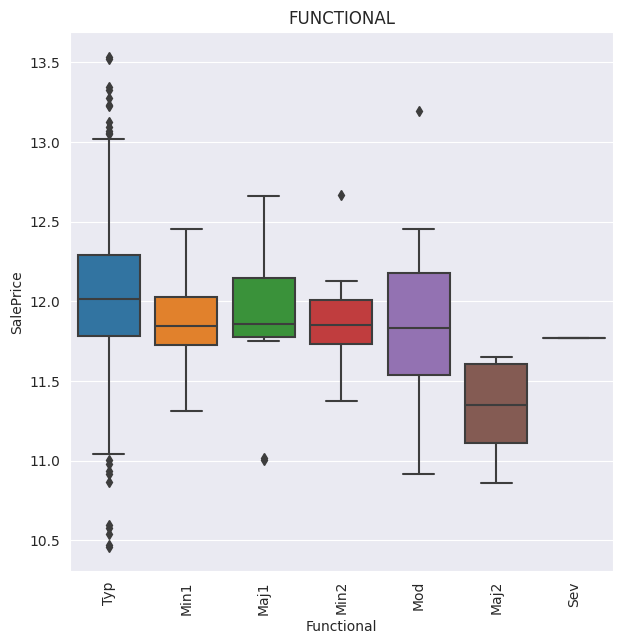

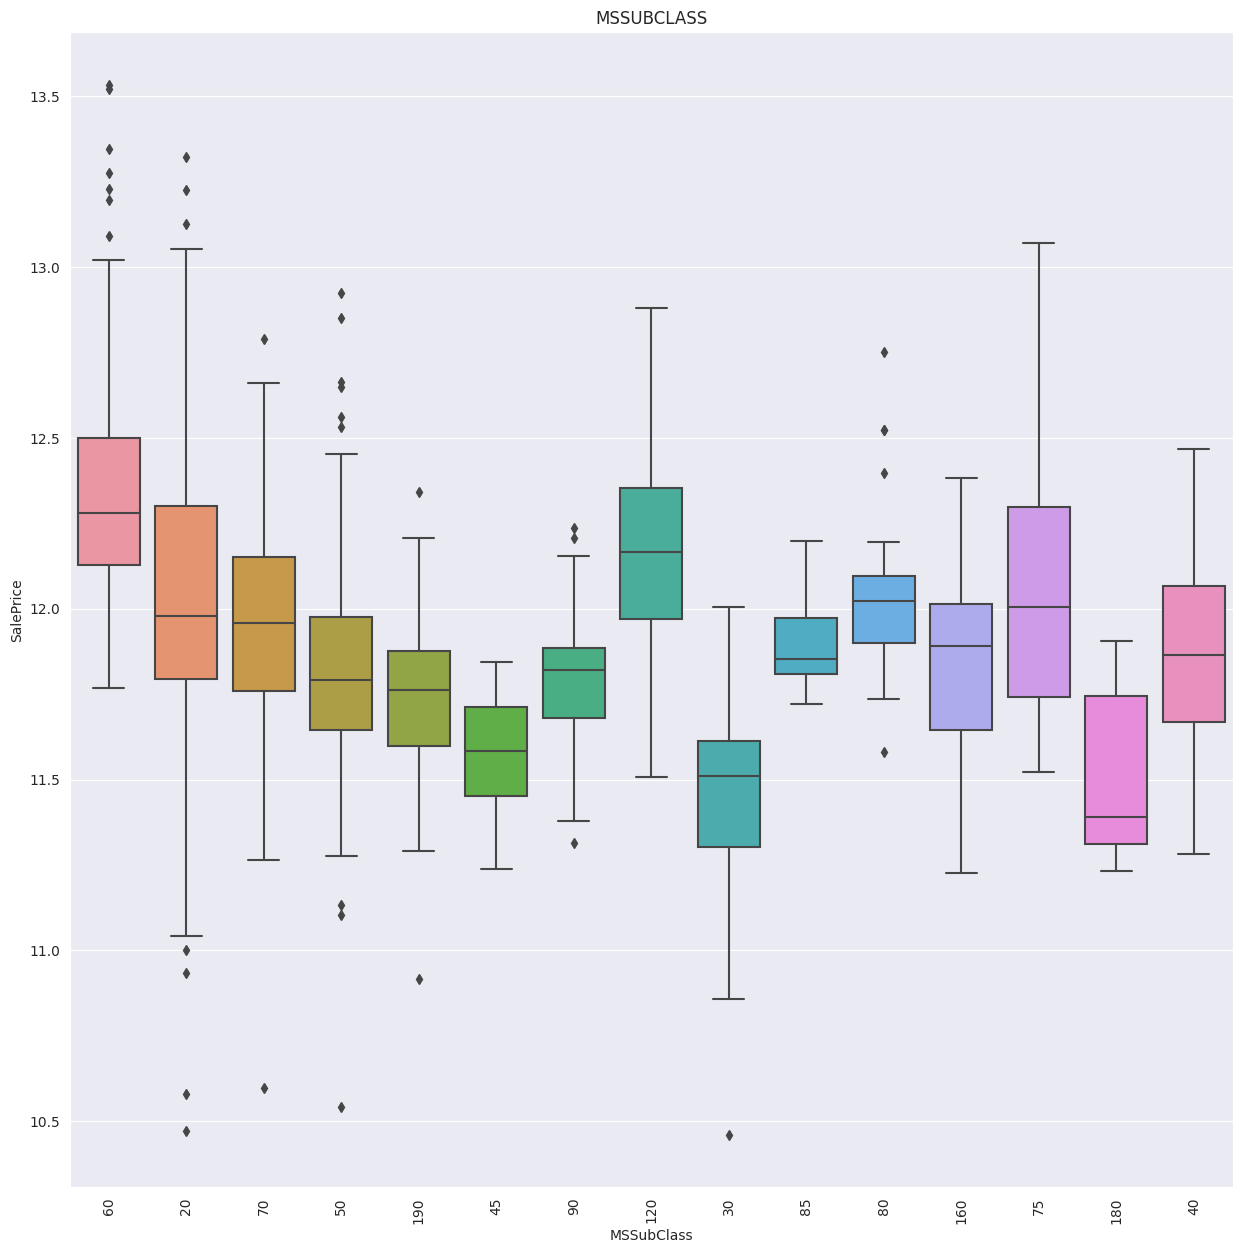

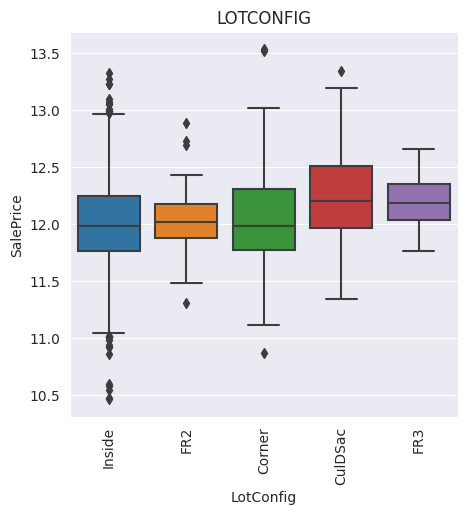

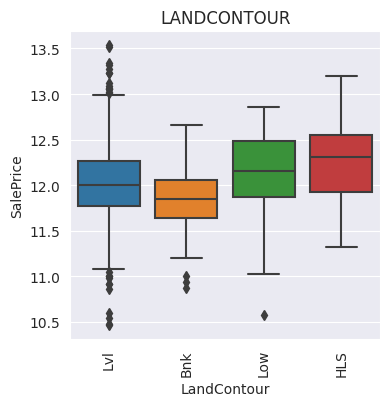

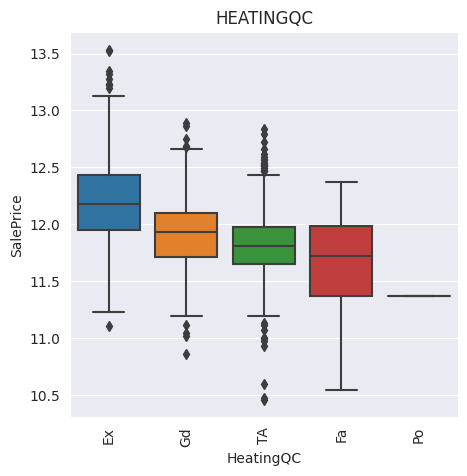

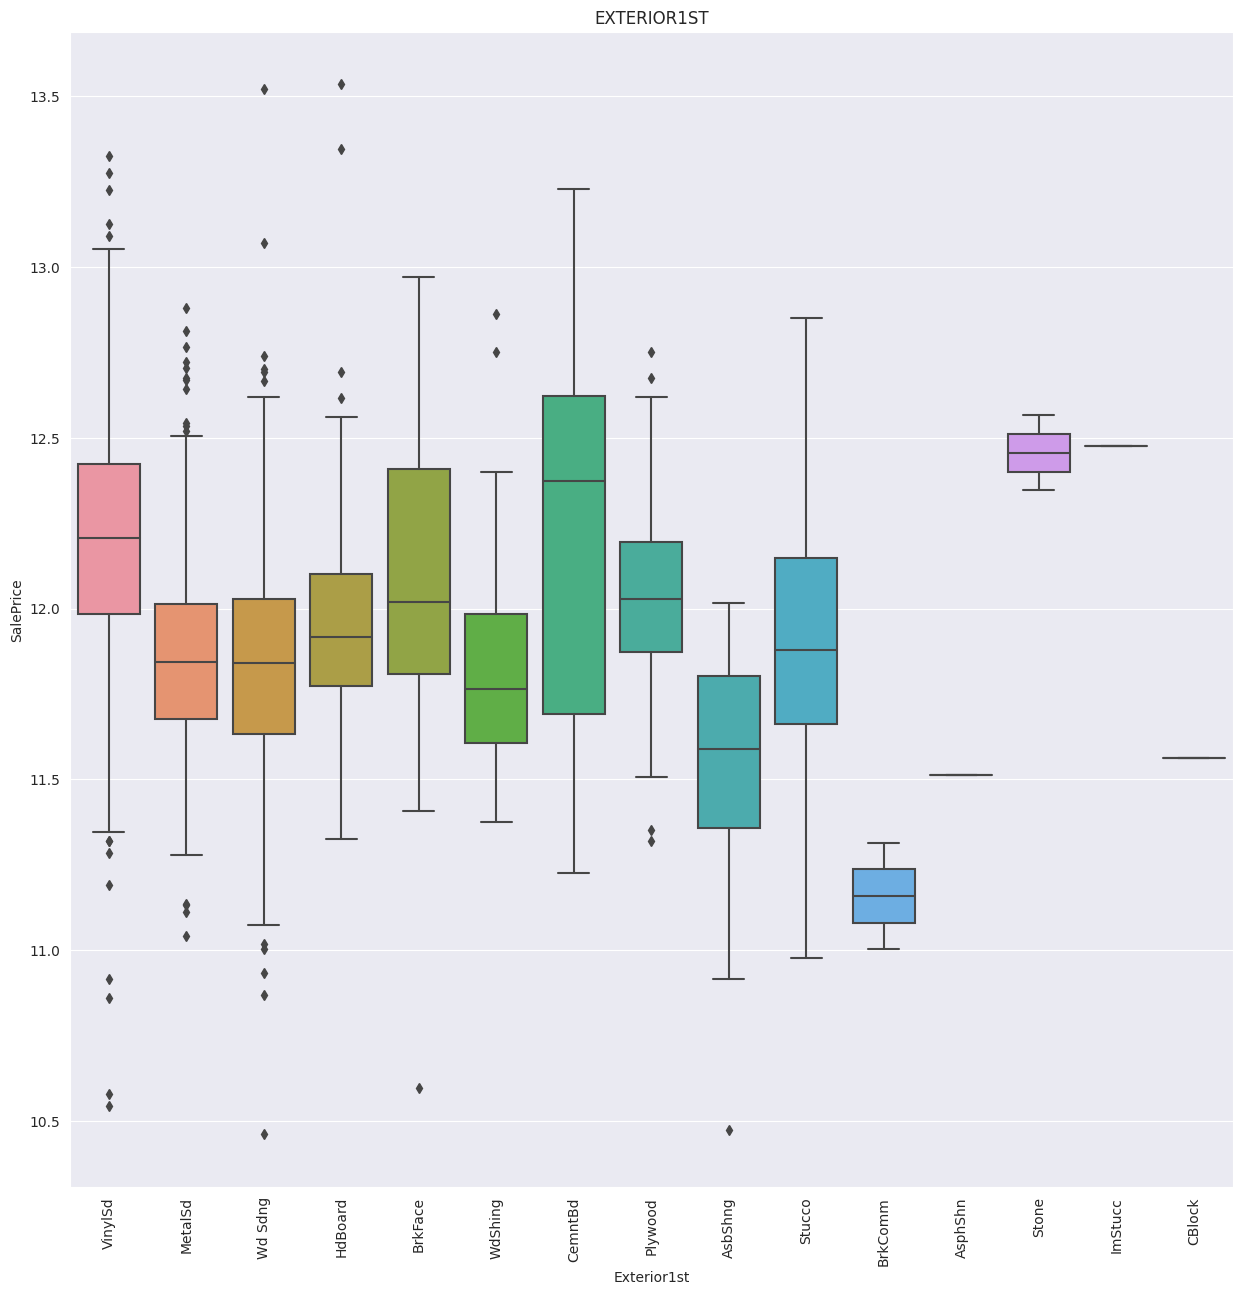

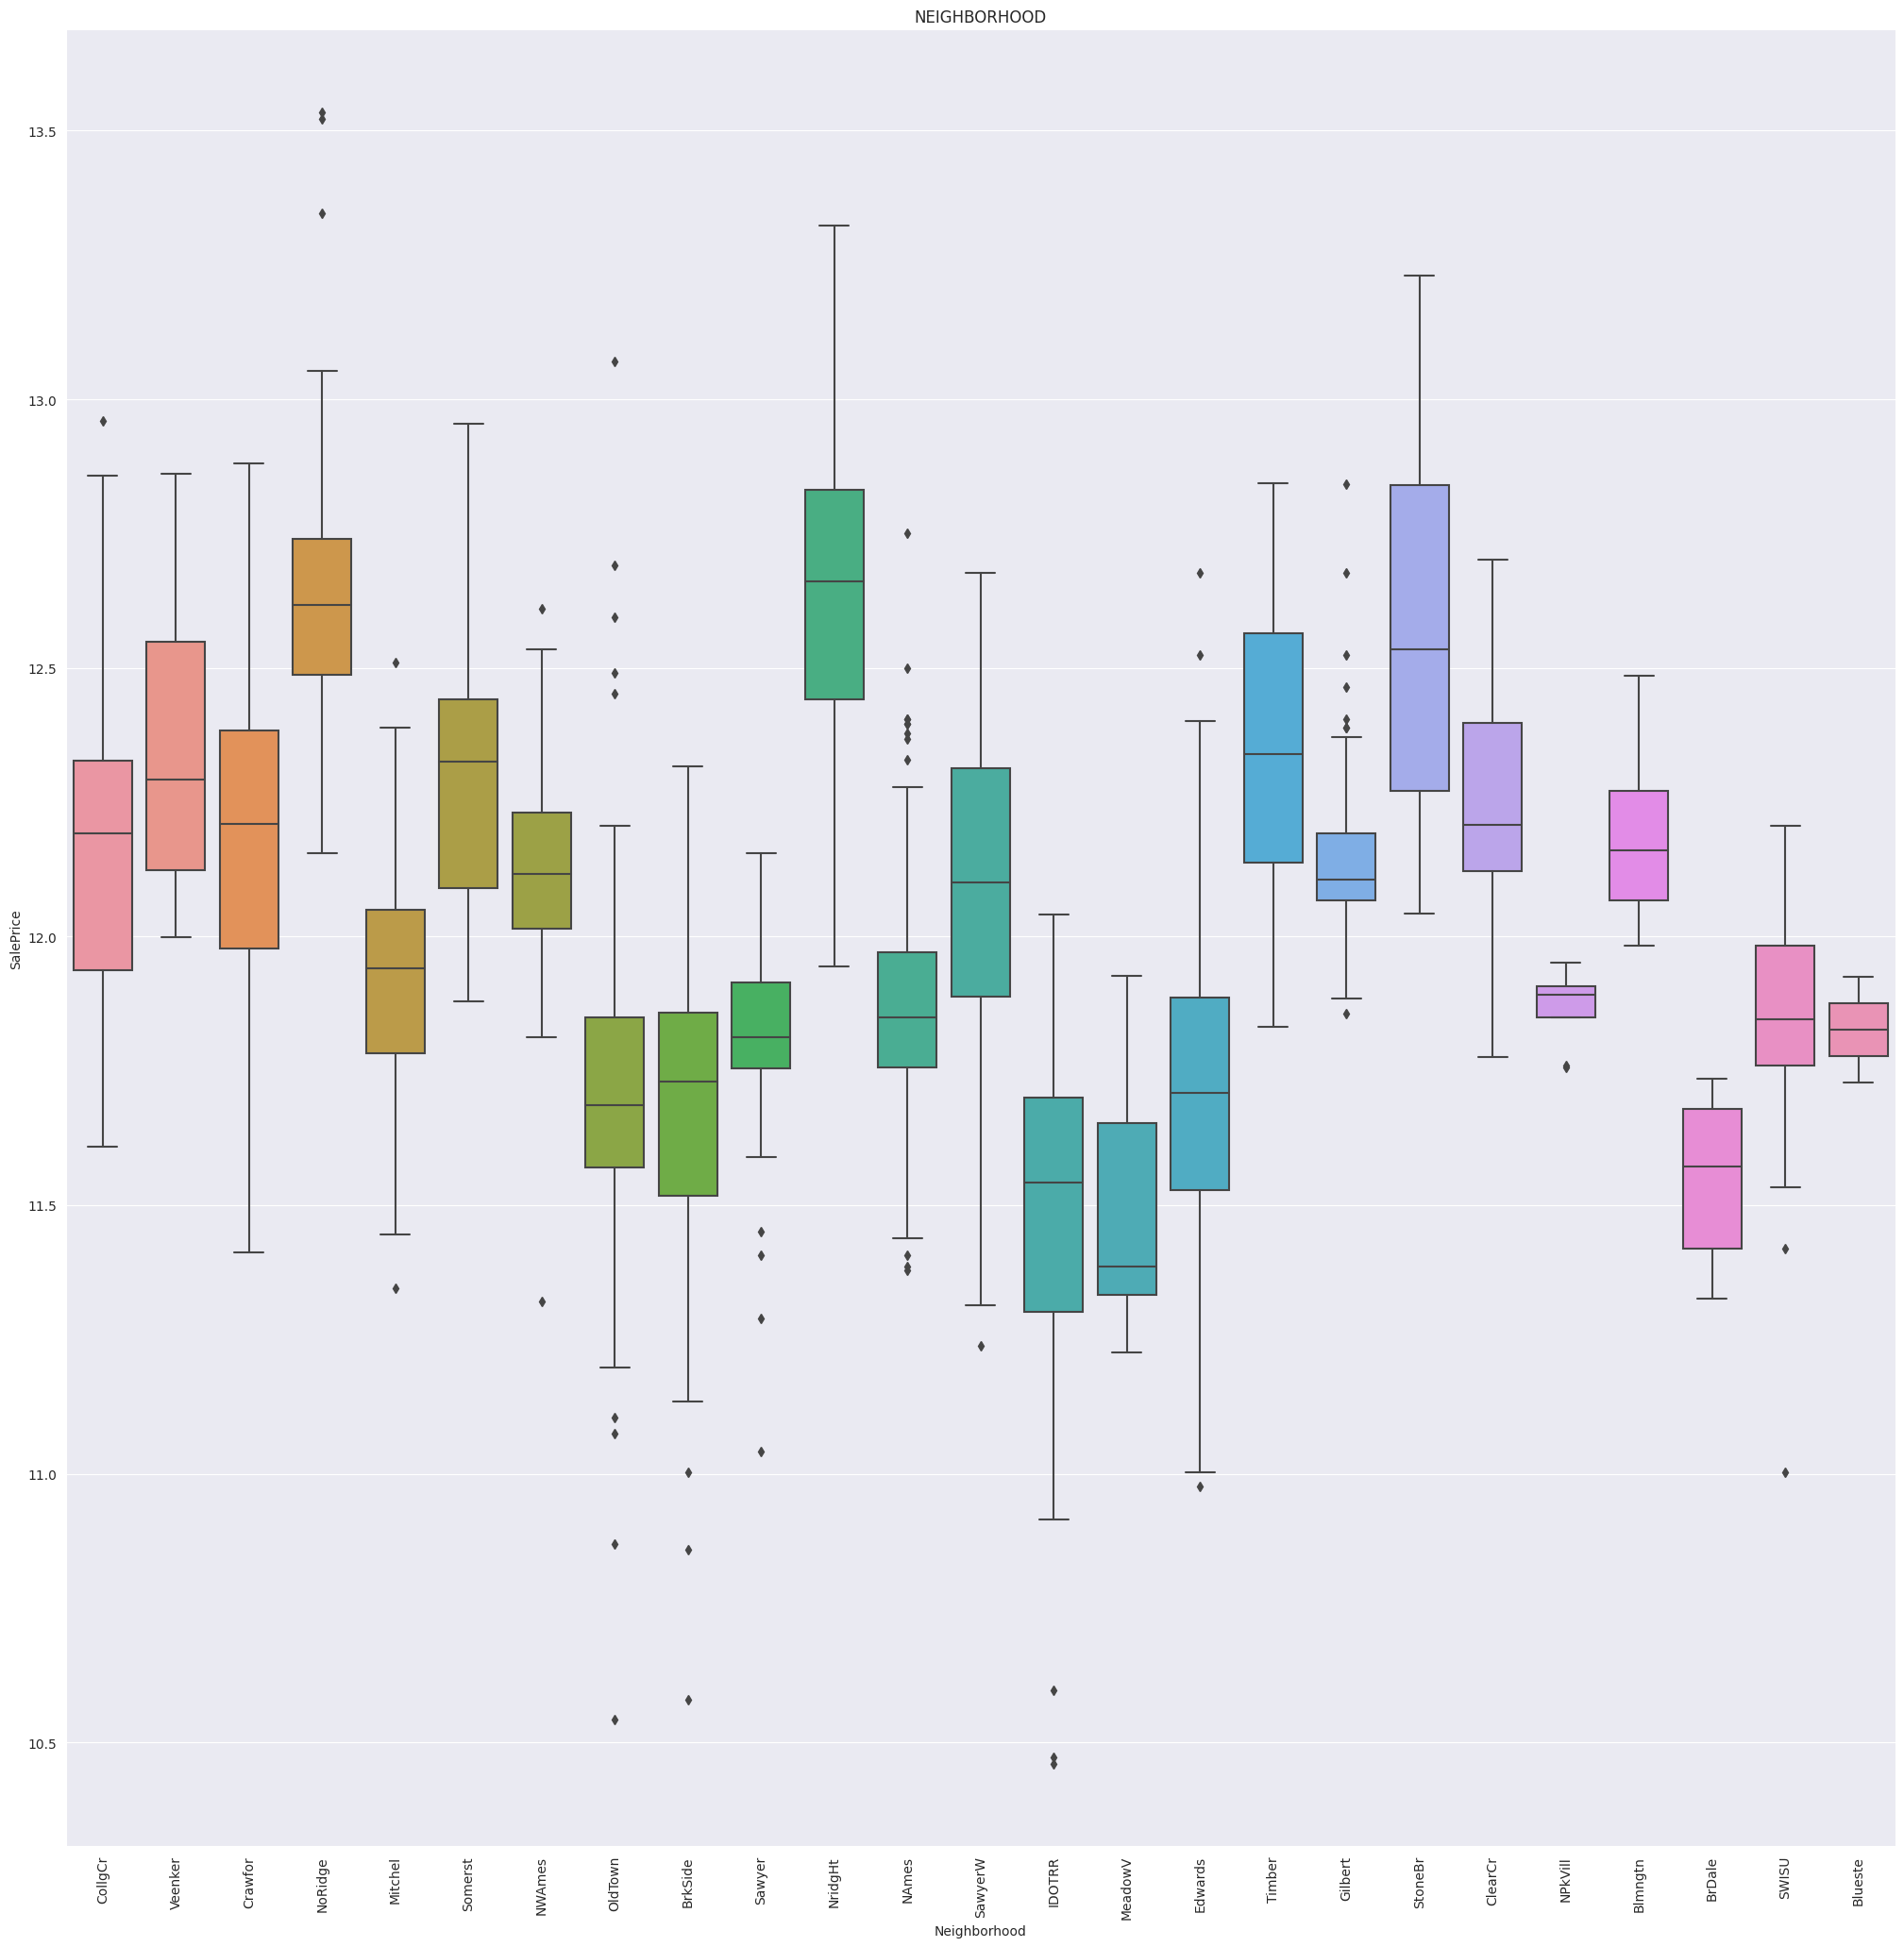

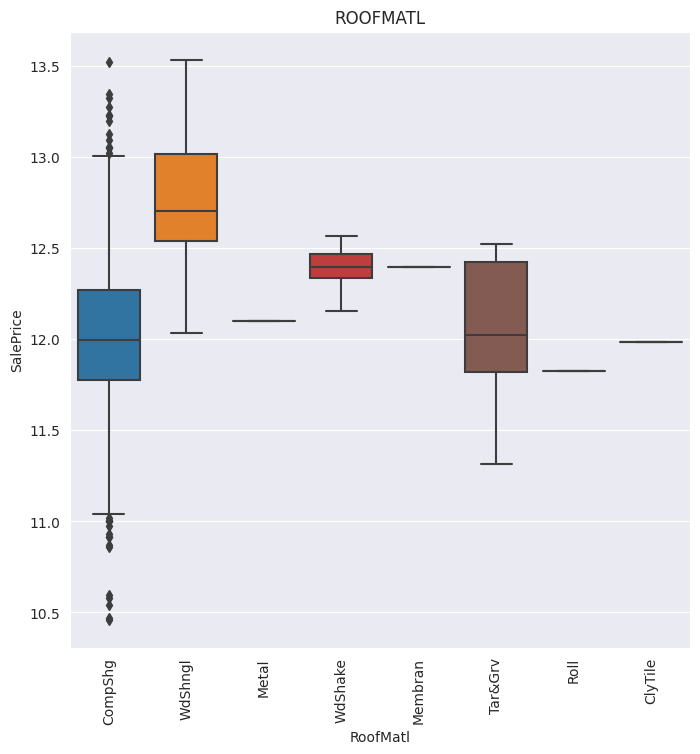

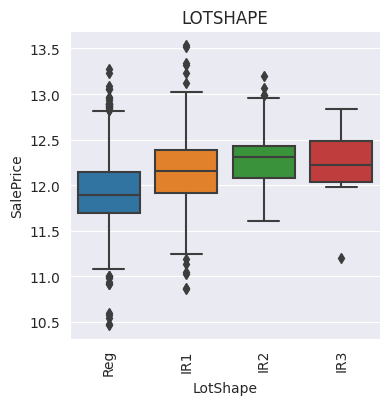

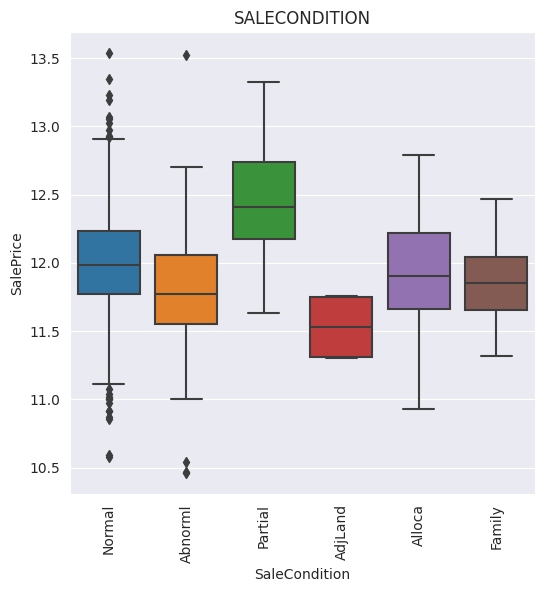

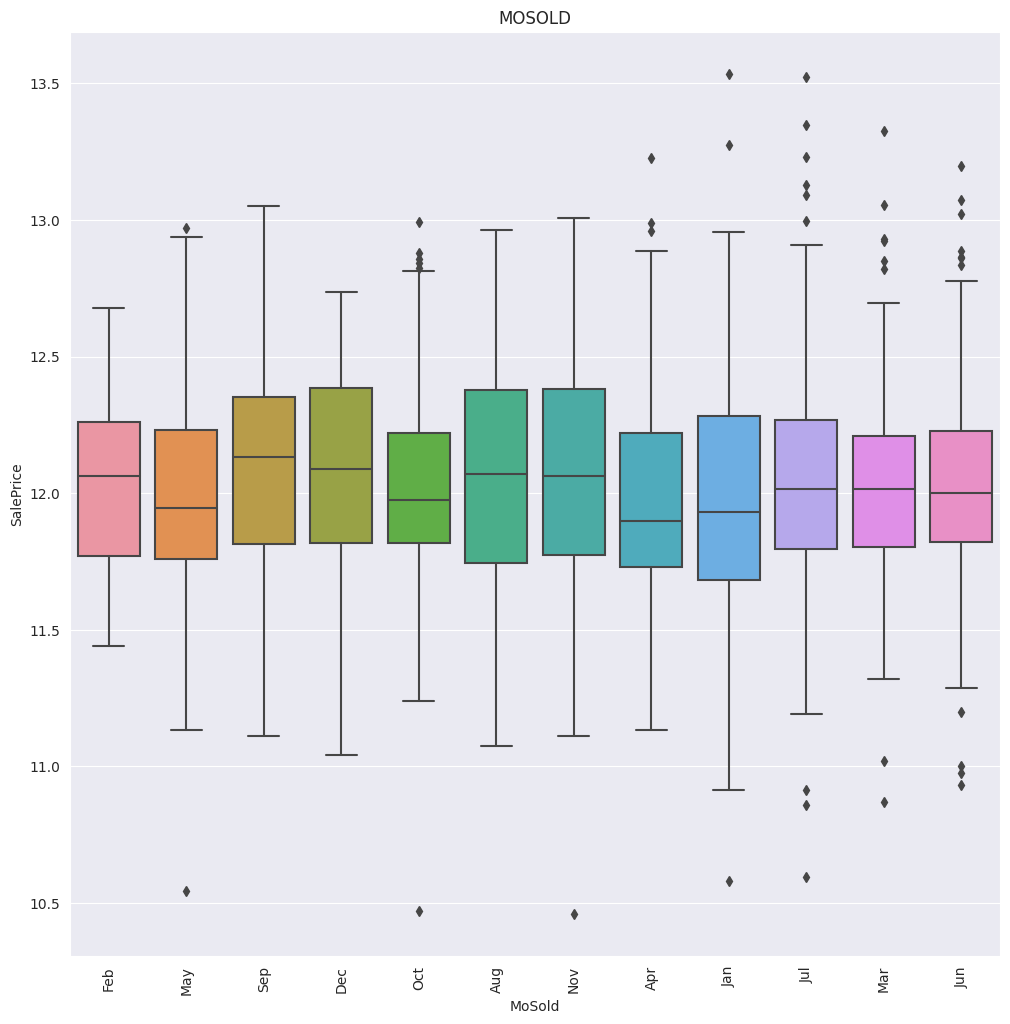

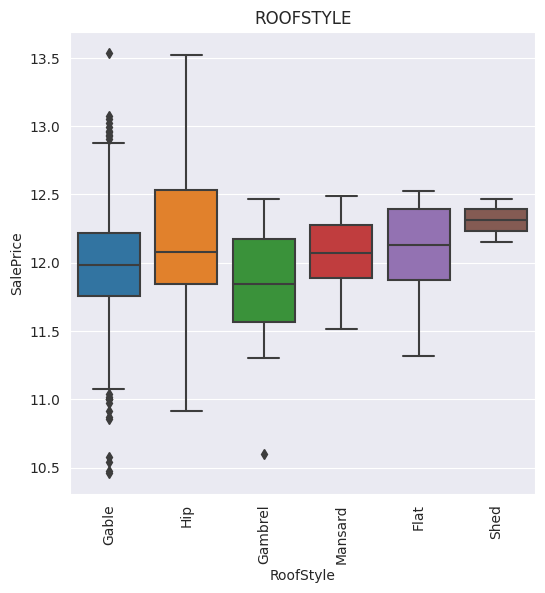

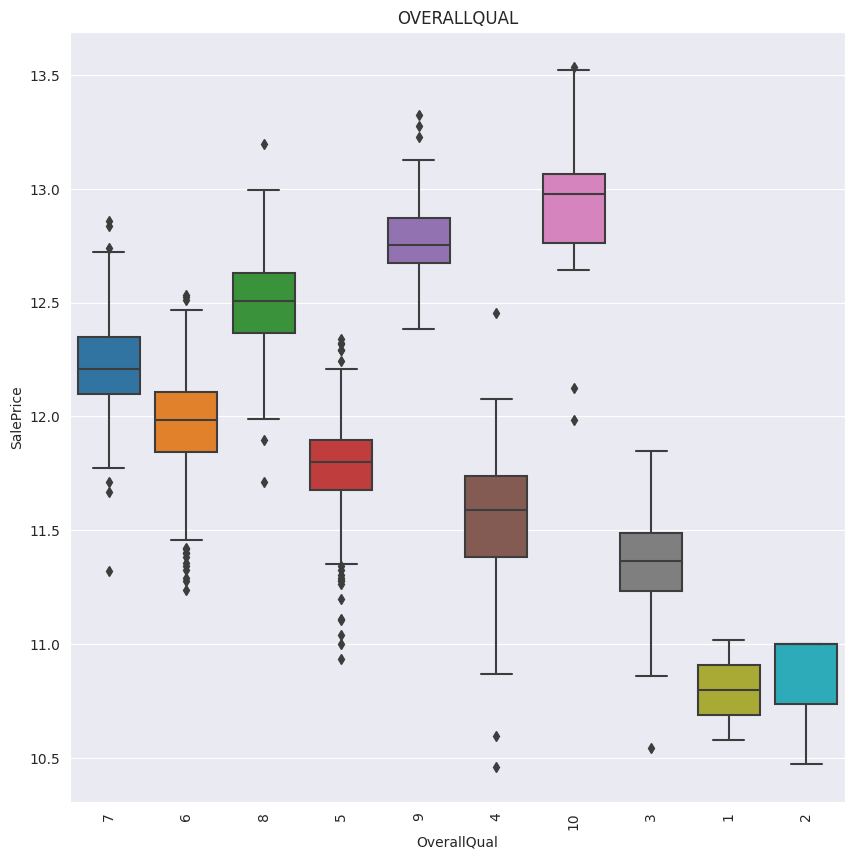

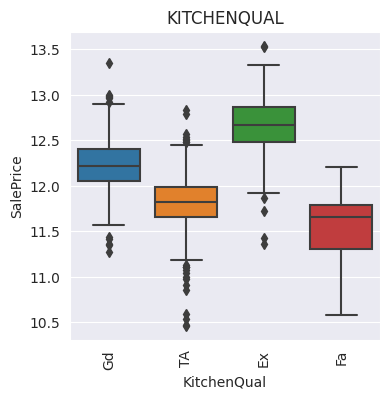

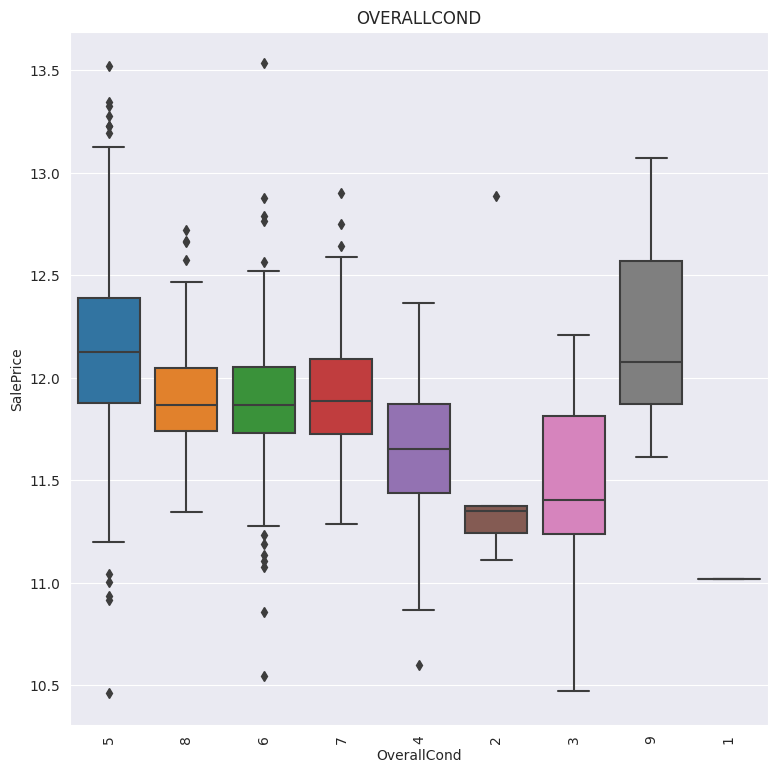

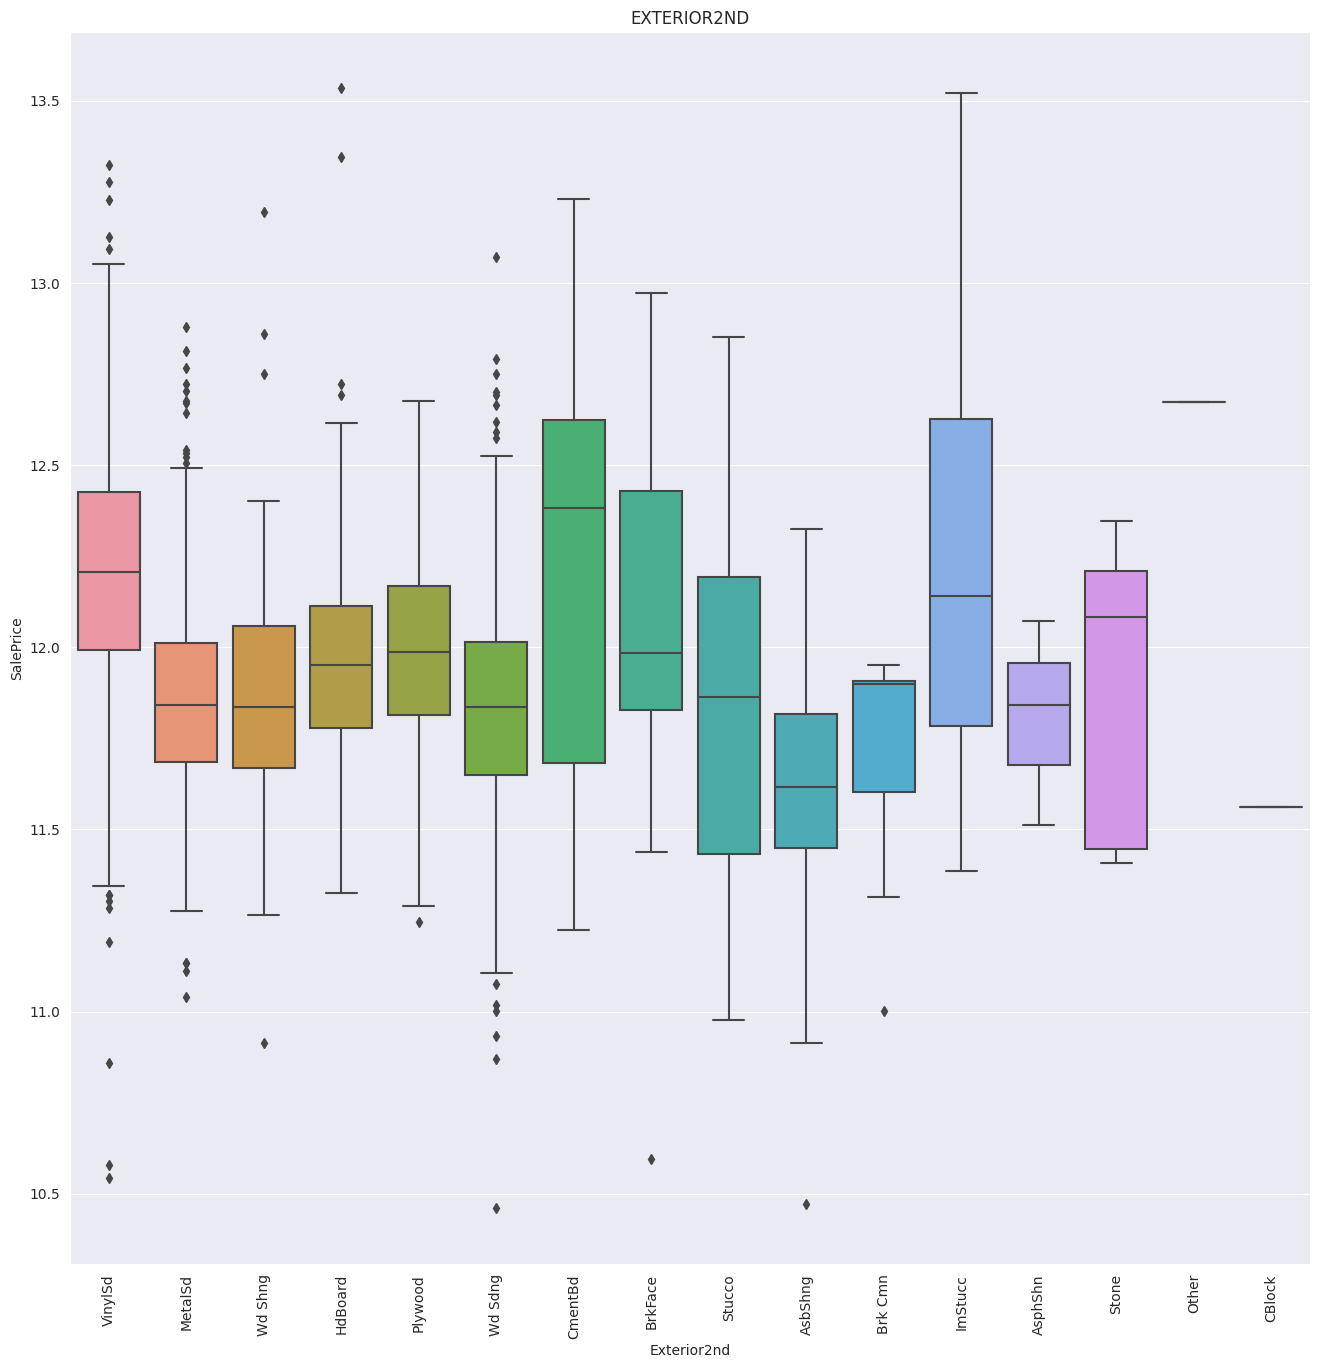

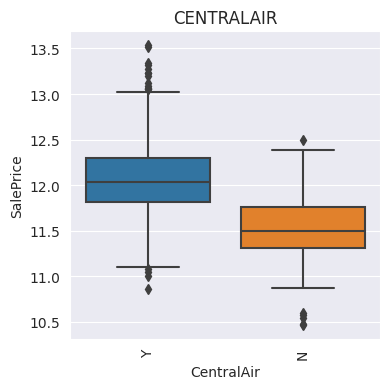

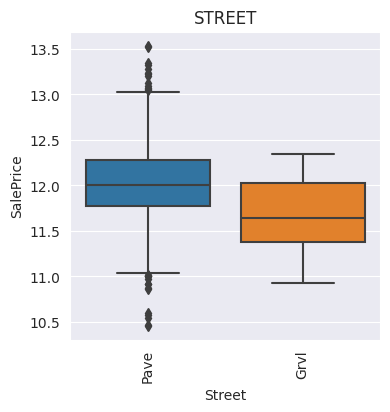

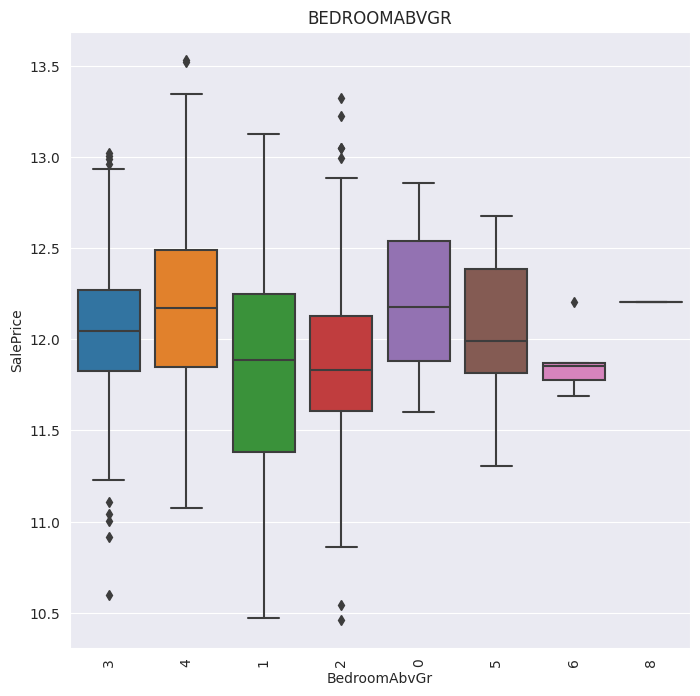

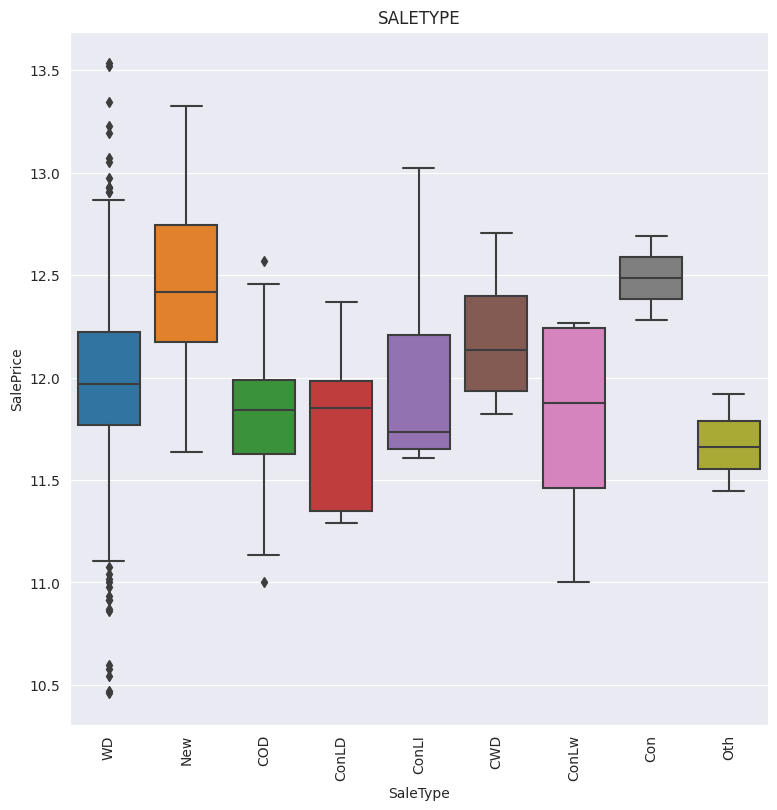

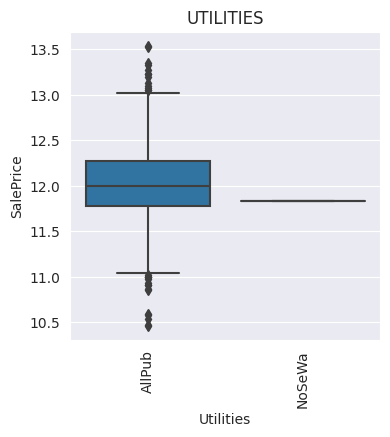

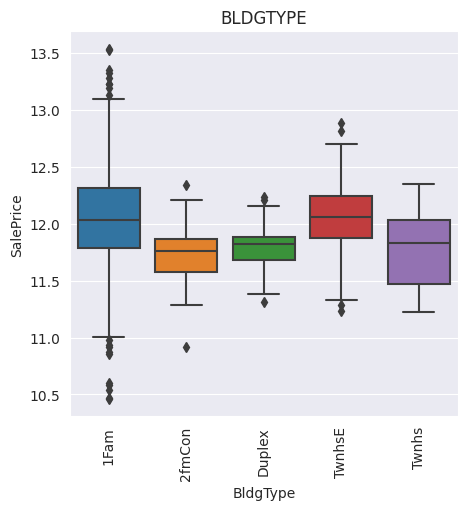

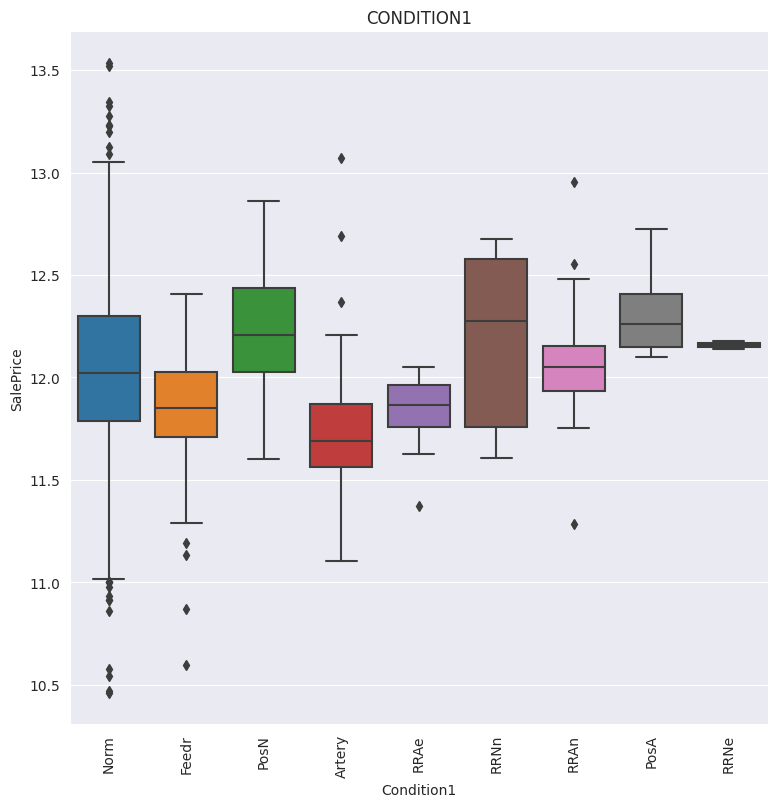

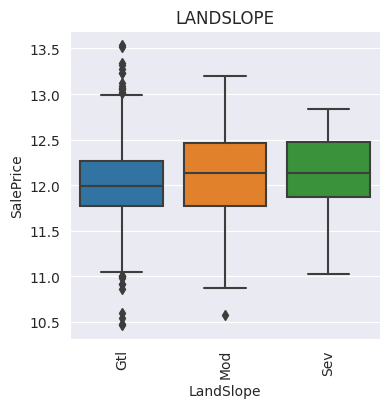

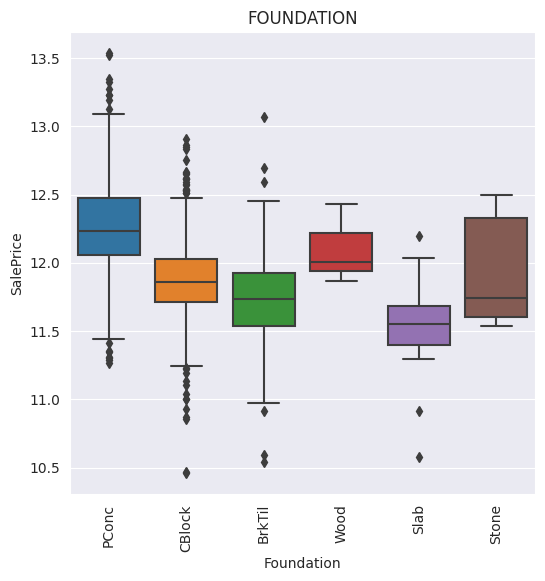

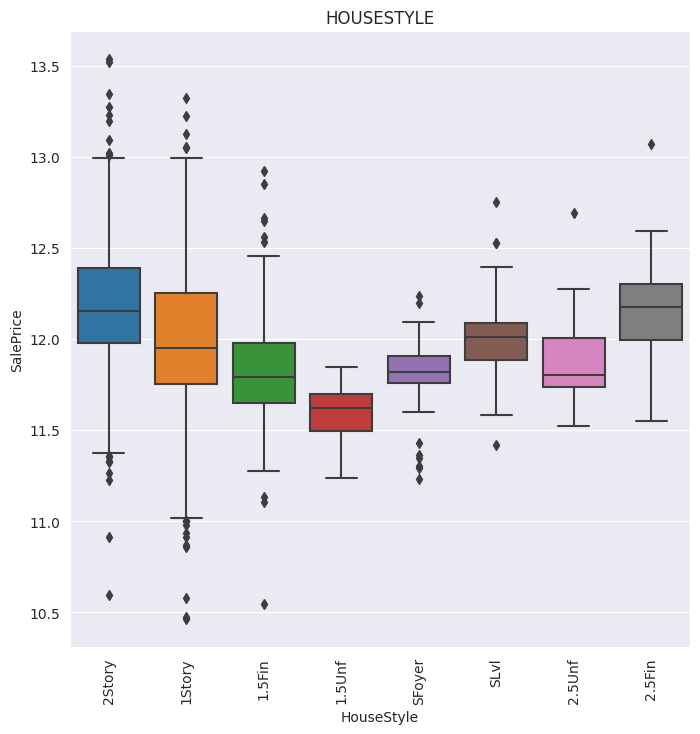

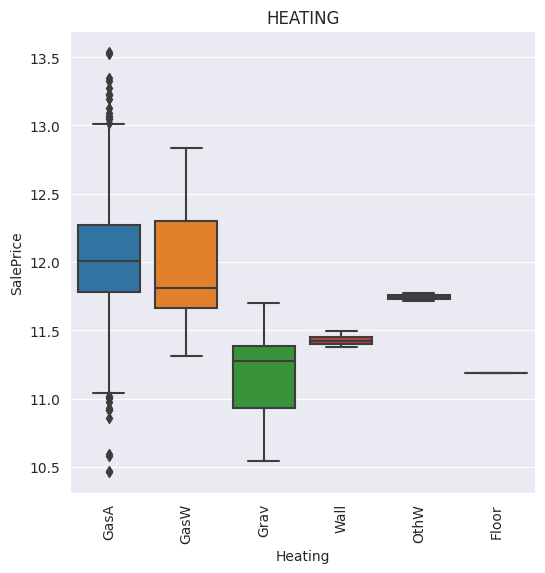

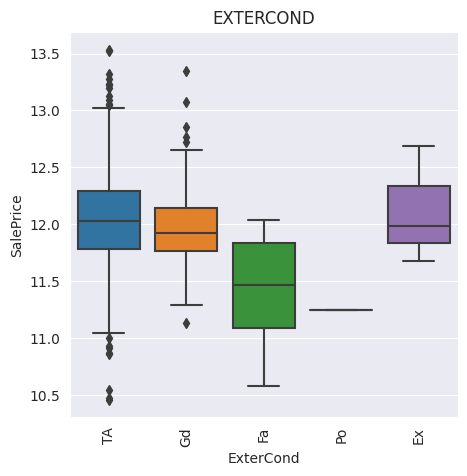

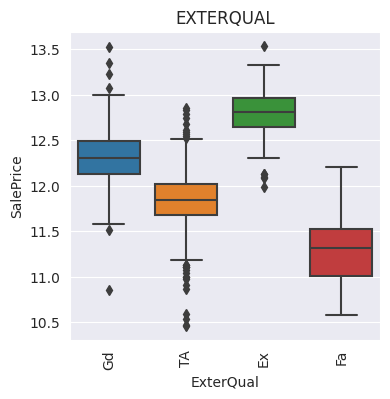

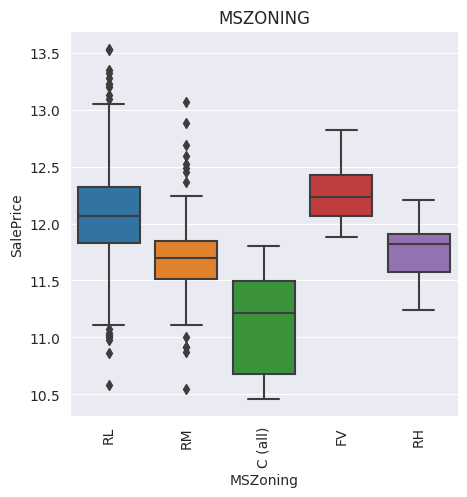

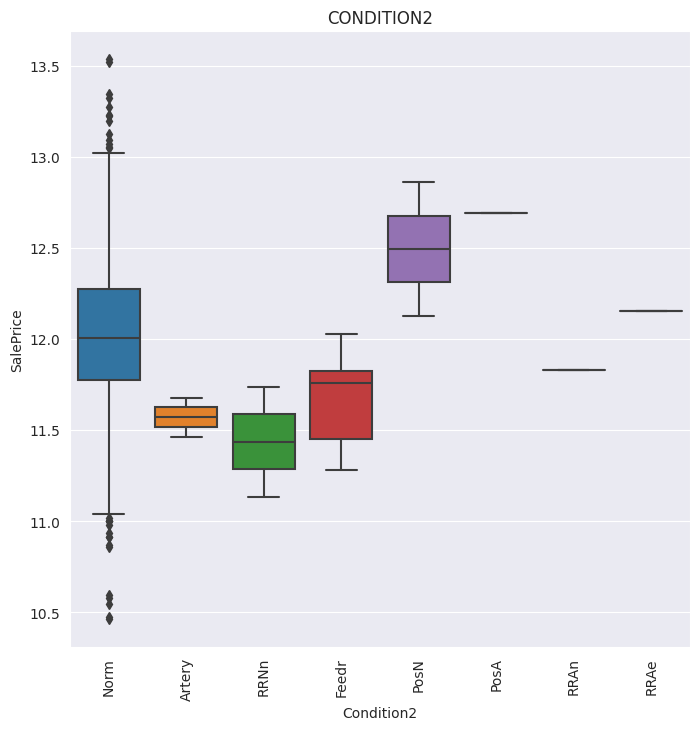

In [38]:
# fig, axs = plt.subplots(36, 1, figsize=(20, 6))
for itr, i in enumerate(categorical_columns):
    a = X[i].nunique()
    if a < 4:
        a = 4
    plt.figure(figsize=(a, a))
    sns.boxplot(x=X[i], y=Y_log)
    plt.title(f"{str(i).upper()}")
    plt.xticks(rotation=90)
    plt.show()

### Data Preparation

In [39]:
X_cat = pd.get_dummies(X[categorical_columns], drop_first=True, prefix=[f"{i}_" for i in categorical_columns]).astype(int)
X_num = X[numerical_columns]
X_final = pd.concat((X_cat, X_num), axis=1)
del X_cat, X_num
X_final.head()

,KitchenAbvGr__1,KitchenAbvGr__2,KitchenAbvGr__3,PavedDrive__P,PavedDrive__Y,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sev,Functional__Typ,MSSubClass__160,MSSubClass__180,MSSubClass__190,MSSubClass__20,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,LandContour__HLS,LandContour__Low,LandContour__Lvl,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stone,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,RoofMatl__CompShg,RoofMatl__Membran,RoofMatl__Metal,RoofMatl__Roll,RoofMatl__Tar&Grv,RoofMatl__WdShake,RoofMatl__WdShngl,LotShape__IR2,LotShape__IR3,LotShape__Reg,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial,MoSold__Aug,MoSold__Dec,MoSold__Feb,MoSold__Jan,MoSold__Jul,MoSold__Jun,MoSold__Mar,MoSold__May,MoSold__Nov,MoSold__Oct,MoSold__Sep,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,OverallQual__10,OverallQual__2,OverallQual__3,OverallQual__4,OverallQual__5,OverallQual__6,OverallQual__7,OverallQual__8,OverallQual__9,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__TA,OverallCond__2,OverallCond__3,OverallCond__4,OverallCond__5,OverallCond__6,OverallCond__7,OverallCond__8,OverallCond__9,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Other,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__VinylSd,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,CentralAir__Y,Street__Pave,BedroomAbvGr__1,BedroomAbvGr__2,BedroomAbvGr__3,BedroomAbvGr__4,BedroomAbvGr__5,BedroomAbvGr__6,BedroomAbvGr__8,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,Utilities__NoSeWa,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,LandSlope__Mod,LandSlope__Sev,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,HouseStyle__1.5Unf,HouseStyle__1Story,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,ExterCond__Fa,ExterCond__Gd,ExterCond__Po,ExterCond__TA,ExterQual__Fa,ExterQual__Gd,ExterQual__TA,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Condition2__Feedr,Condition2__Norm,Condition2__PosA,Condition2__PosN,Condition2__RRAe,Condition2__RRAn,Condition2__RRNn,WoodDeckSF,Fireplaces,BsmtUnfSF,MiscVal,OpenPorchSF,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtFinSF2,2ndFlrSF,EnclosedPorch,LotArea,3SsnPorch,GarageCars,GarageArea,LowQualFinSF,BsmtHalfBath,PoolArea,BsmtFinSF1,TotRmsAbvGrd,FullBath,HalfBath,ScreenPorch,BuiltAge,LastRemod,LastSold,1stFlrSF
0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

Final shape of the training data

In [40]:
X_final.shape 

(1460, 234)

In [41]:
final_columns = X_final.columns.to_list()

In [42]:
Y_final = Y_log.copy()
del Y_log
Y_final.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

## Data Preparation for model training

### Train-Test Split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, train_size=0.7, random_state=42)

### Scaling the data

In [44]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=final_columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=final_columns)

Using standard scaling since it is providing better results

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021, 234), (439, 234), (1021,), (439,))

<Axes: xlabel='SalePrice', ylabel='Density'>

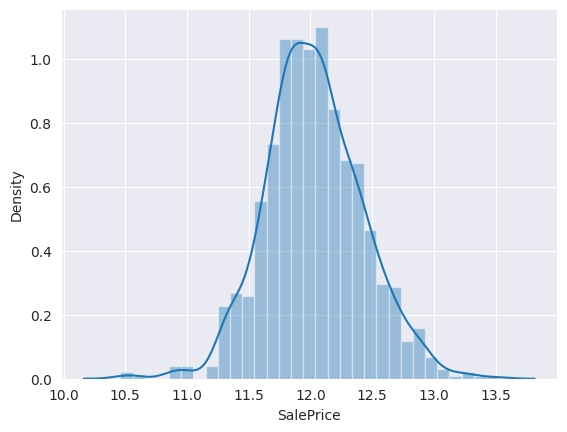

In [46]:
sns.distplot(y_train)

In [47]:
X_train.head()

,KitchenAbvGr__1,KitchenAbvGr__2,KitchenAbvGr__3,PavedDrive__P,PavedDrive__Y,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sev,Functional__Typ,MSSubClass__160,MSSubClass__180,MSSubClass__190,MSSubClass__20,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,LandContour__HLS,LandContour__Low,LandContour__Lvl,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stone,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,RoofMatl__CompShg,RoofMatl__Membran,RoofMatl__Metal,RoofMatl__Roll,RoofMatl__Tar&Grv,RoofMatl__WdShake,RoofMatl__WdShngl,LotShape__IR2,LotShape__IR3,LotShape__Reg,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial,MoSold__Aug,MoSold__Dec,MoSold__Feb,MoSold__Jan,MoSold__Jul,MoSold__Jun,MoSold__Mar,MoSold__May,MoSold__Nov,MoSold__Oct,MoSold__Sep,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,OverallQual__10,OverallQual__2,OverallQual__3,OverallQual__4,OverallQual__5,OverallQual__6,OverallQual__7,OverallQual__8,OverallQual__9,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__TA,OverallCond__2,OverallCond__3,OverallCond__4,OverallCond__5,OverallCond__6,OverallCond__7,OverallCond__8,OverallCond__9,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Other,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__VinylSd,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,CentralAir__Y,Street__Pave,BedroomAbvGr__1,BedroomAbvGr__2,BedroomAbvGr__3,BedroomAbvGr__4,BedroomAbvGr__5,BedroomAbvGr__6,BedroomAbvGr__8,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,Utilities__NoSeWa,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,LandSlope__Mod,LandSlope__Sev,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,HouseStyle__1.5Unf,HouseStyle__1Story,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,ExterCond__Fa,ExterCond__Gd,ExterCond__Po,ExterCond__TA,ExterQual__Fa,ExterQual__Gd,ExterQual__TA,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Condition2__Feedr,Condition2__Norm,Condition2__PosA,Condition2__PosN,Condition2__RRAe,Condition2__RRAn,Condition2__RRNn,WoodDeckSF,Fireplaces,BsmtUnfSF,MiscVal,OpenPorchSF,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtFinSF2,2ndFlrSF,EnclosedPorch,LotArea,3SsnPorch,GarageCars,GarageArea,LowQualFinSF,BsmtHalfBath,PoolArea,BsmtFinSF1,TotRmsAbvGrd,FullBath,HalfBath,ScreenPorch,BuiltAge,LastRemod,LastSold,1stFlrSF
0,0.222108,-0.219669,0.0,-0.148398,0.30328,-0.062715,-0.155152,-0.158431,-0.113564,-0.031311,0.28359,-0.214724,12.035661,-0.151809,-0.765117,-0.217208,-0.044302,-0.094

## Linear Regression Model Training

In [48]:
slr_estimator = LinearRegression()

In [49]:
rfe_model = RFE(slr_estimator, n_features_to_select=0.5)
rfe_model = rfe_model.fit(X_train, y_train)

In [50]:
rfe_analysis = pd.DataFrame(list(zip(final_columns, rfe_model.support_, rfe_model.ranking_)), columns=['ColumnName', 'Support', 'Rank'])
rfe_analysis.sort_values(by='Rank')

,ColumnName,Support,Rank
116,KitchenQual__TA,True,1
121,OverallCond__6,True,1
122,OverallCond__7,True,1
123,OverallCond__8,True,1
124,OverallCond__9,True,1
...,...,...,...
62,Neighborhood__NPkVill,False,114
152,SaleType__ConLI,False,115
99,MoSold__Sep,False,116
145,BedroomAbvGr__4,False,117


In [51]:
selected_colums = rfe_analysis[rfe_analysis.Support]['ColumnName']
selected_colums

1             KitchenAbvGr__2
2             KitchenAbvGr__3
5            Functional__Maj2
9             Functional__Sev
10            Functional__Typ
13            MSSubClass__190
14             MSSubClass__20
15             MSSubClass__30
16             MSSubClass__40
17             MSSubClass__45
18             MSSubClass__50
19             MSSubClass__60
20             MSSubClass__70
21             MSSubClass__75
22             MSSubClass__80
23             MSSubClass__85
24             MSSubClass__90
25         LotConfig__CulDSac
33              HeatingQC__Gd
35              HeatingQC__TA
37       Exterior1st__BrkComm
38       Exterior1st__BrkFace
39        Exterior1st__CBlock
42       Exterior1st__ImStucc
43       Exterior1st__MetalSd
52      Neighborhood__BrkSide
55      Neighborhood__Crawfor
56      Neighborhood__Edwards
59      Neighborhood__MeadowV
64      Neighborhood__NoRidge
65      Neighborhood__NridgHt
71      Neighborhood__StoneBr
74          RoofMatl__CompShg
75        

In [52]:
X_train[selected_colums].head()

,KitchenAbvGr__2,KitchenAbvGr__3,Functional__Maj2,Functional__Sev,Functional__Typ,MSSubClass__190,MSSubClass__20,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,LotConfig__CulDSac,HeatingQC__Gd,HeatingQC__TA,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__ImStucc,Exterior1st__MetalSd,Neighborhood__BrkSide,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__MeadowV,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__StoneBr,RoofMatl__CompShg,RoofMatl__Membran,RoofMatl__Metal,RoofMatl__Roll,RoofMatl__Tar&Grv,RoofMatl__WdShake,RoofMatl__WdShngl,SaleCondition__Alloca,SaleCondition__Normal,SaleCondition__Partial,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Hip,OverallQual__10,OverallQual__2,OverallQual__3,OverallQual__4,OverallQual__5,OverallQual__6,OverallQual__7,OverallQual__8,OverallQual__9,KitchenQual__Gd,KitchenQual__TA,OverallCond__2,OverallCond__3,OverallCond__4,OverallCond__5,OverallCond__6,OverallCond__7,OverallCond__8,OverallCond__9,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__MetalSd,CentralAir__Y,SaleType__Oth,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,Condition1__Norm,LandSlope__Sev,Foundation__PConc,HouseStyle__1.5Unf,HouseStyle__1Story,HouseStyle__2.5Fin,HouseStyle__2Story,Heating__GasA,Heating__GasW,Heating__Grav,Heating__Wall,ExterCond__Gd,ExterQual__Gd,ExterQual__TA,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Condition2__Feedr,Condition2__Norm,Condition2__PosA,Condition2__PosN,Condition2__RRNn,WoodDeckSF,Fireplaces,BsmtUnfSF,MiscVal,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtFinSF2,2ndFlrSF,EnclosedPorch,LotArea,GarageCars,GarageArea,LowQualFinSF,BsmtFinSF1,TotRmsAbvGrd,FullBath,HalfBath,ScreenPorch,BuiltAge,LastRemod,1stFlrSF
0,-0.219669,0.0,-0.062715,-0.031311,0.28359,-0.151809,-0.765117,-0.217208,-0.044302,-0.094304,-0.324004,-0.504281,-0.224525,-0.113564,-0.201928,-0.113564,-0.191176,-0.281569,2.237383,-0.635926,-0.044302,-0.188406,-0.031311,0.0,-0.413366,-0.20454,-0.196614,3.453122,-0.099454,-0.167921,-0.226921,-0.141351,0.137703,0.0,-0.031311,-0.031311,-0.094304,-0.054286,-0.062715,-0.070152,0.461074,-0.30135,0.543770,-0.094304,-0.504281,-0.10436,-0.031311,-0.11791,-0.291575,1.706422,-0.601110,-0.537719,-0.368383,-0.173990,-0.827538,0.999021,-0.062715,-0.133963,-0.193911,0.873719,-0.459511,-0.401929,-0.214724,-0.130124,-0.11791,-0.031311,-0.401929,0.281569,-0.031311,-0.191176,-0.170979,3.429650,0.405211,-0.094304,1.115328,-0.10436,-0.989284,-0.083086,-0.669498,0.158431,-0.122109,-0.062715,-0.054286,-0.331335,-0.706587,0.778040,-0.209684,-0.113564,-1.936191,2.363704,-0.054286,0.094304,0.0,-0.044302,0.0,-0.740733,-0.942382,-1.280843,-0.123048,-1.145679,-0.860896,1.111135,-0.280483,-0.802940,-0.346561,-0.624089,0.296221,0.229957,-0.120373,0.218347,-0.947493,-1.068975,-0.759102,-0.276042,-1.105862,-0.975231,-0.249823
1,-0.219669,0.0,-0.062715,-0.031311,0.28359,-0.151809,-0.765117,-0.217208,-0.044302,-0.094304,-0.324004,1.983020,-0.224525,-0.113564,-0.201928,-0.113564,-0.191176,-0.281569,-0.446951,-0.635926,-0.044302,-0.188406,-0.031311,0.0,-0.413366,-0.20454,-0.196614,-0.289593,-0.099454,-0.167921,-0.226921,-0.141351,0.137703,0.0,-0.031311,-0.031311,-0.094304,-0.054286,-0.062715,-0.070152,0.461074,-0.30135,0.543770,-0.094304,-0.504281,-0.10436,-0.031311,-0.11791,-0.291575,-0.586021,-0.601110,1.859708,-0.368383,-0.173990,1.208404,-1.000980,-0.062715,-0.133963,-0.193911,0.873719,-0.459511,-0.401929,-0.214724,-0.130124,-0.11791,-0.031311,-0.401929,0.281569,-0.031311,-0.191176,-0.170979,-0.291575,0.405211,-0.094304,1.115328,-0.10436,-0.989284,-0.083086,1.493657,0.158431,-0.122109,-0.062715,-0.054286,-0.331335,-0.706587,0.778040,4.769087,-0.113564,-1.936191,-0.423065,-0.054286,0.094304,0.0,-0.044302,0.0,0.542566,-0.942382,0.362572,-0.123048,-0.678492,0.033726,-0.814958,-0.280483,0.972627,-0.346561,-0.185863,0.296221,0.656945,-0.120373,-0.919206,0.279381,0.7

In [53]:
X_train_subset = X_train[selected_colums]
X_test_subset = X_test[selected_colums]

In [54]:
lr_model = LinearRegression()
lr_model.fit(X_train_subset, y_train)

LinearRegression()

In [55]:
lr_model.coef_

array([-1.76315448e-02,  3.14608612e+12, -1.31895049e-02, -1.37267897e-02,
        1.63291364e-02, -3.24539659e+11, -1.05548532e+12, -4.53648846e+11,
       -9.67031624e+10, -2.04432574e+11, -6.41298818e+11, -8.79297750e+11,
       -4.67487238e+11, -2.45211328e+11, -4.24329364e+11, -2.45211328e+11,
        1.24196268e+11,  1.03358930e-02, -8.85342868e-03, -1.38022138e-02,
       -1.03699341e-02,  1.88771502e-02, -2.30830510e+11, -9.35168560e+10,
        2.40926194e-02,  1.19491354e-02,  2.30126466e-02, -1.03449949e-02,
       -1.12210665e-02,  6.99363172e-03,  1.47162275e-02,  1.53447980e-02,
        3.48241859e-01,  7.81284028e+10,  8.31604004e-02,  8.61206055e-02,
        2.41790771e-01,  1.38580322e-01,  1.66351318e-01,  1.31378174e-02,
        2.11181641e-02,  3.05786133e-02, -5.56030273e-02, -1.00402832e-02,
       -5.37872314e-02,  9.89990234e-02,  1.29394531e-02,  6.55822754e-02,
        1.71020508e-01,  2.93273926e-01,  3.17504883e-01,  3.13507080e-01,
        2.67089844e-01,  

In [56]:
y_tr_pred = lr_model.predict(X_train_subset)
print(f"R2 score for the training data is {r2_score(y_train, y_tr_pred)}")
print(f"MSE for the training data is {mean_squared_error(y_train, y_tr_pred)}")

R2 score for the training data is 0.9381627288188283
MSE for the training data is 0.00959442705722708


In [57]:
y_ts_pred = lr_model.predict(X_test_subset)
print(f"R2 score for the test data is {r2_score(y_test, y_ts_pred)}")
print(f"MSE for the test data is {mean_squared_error(y_test, y_ts_pred)}")

R2 score for the test data is -4.6310108643871446e+23
MSE for the test data is 7.838743921004908e+22


In [58]:
lr_model.coef_

array([-1.76315448e-02,  3.14608612e+12, -1.31895049e-02, -1.37267897e-02,
        1.63291364e-02, -3.24539659e+11, -1.05548532e+12, -4.53648846e+11,
       -9.67031624e+10, -2.04432574e+11, -6.41298818e+11, -8.79297750e+11,
       -4.67487238e+11, -2.45211328e+11, -4.24329364e+11, -2.45211328e+11,
        1.24196268e+11,  1.03358930e-02, -8.85342868e-03, -1.38022138e-02,
       -1.03699341e-02,  1.88771502e-02, -2.30830510e+11, -9.35168560e+10,
        2.40926194e-02,  1.19491354e-02,  2.30126466e-02, -1.03449949e-02,
       -1.12210665e-02,  6.99363172e-03,  1.47162275e-02,  1.53447980e-02,
        3.48241859e-01,  7.81284028e+10,  8.31604004e-02,  8.61206055e-02,
        2.41790771e-01,  1.38580322e-01,  1.66351318e-01,  1.31378174e-02,
        2.11181641e-02,  3.05786133e-02, -5.56030273e-02, -1.00402832e-02,
       -5.37872314e-02,  9.89990234e-02,  1.29394531e-02,  6.55822754e-02,
        1.71020508e-01,  2.93273926e-01,  3.17504883e-01,  3.13507080e-01,
        2.67089844e-01,  

The $R^2$ value for the test is negative, I am choosing to keep all the columns for Ridge and Lasso Regression

## Ridge and Lasso Regression Models

### Parameters

Setting up parameters for the GridSearch

Number of folds

In [59]:
folds = 5

Possible value of alphas

In [60]:
alphas = sorted(set(np.linspace(0, 1, 9).tolist() + np.linspace(0, 0.125, 9).tolist() + np.linspace(1, 10, 9).tolist() + np.linspace(10, 100, 10).tolist() + np.linspace(100, 1000, 10).tolist()))
params = {'alpha': alphas}
pprint(params)

{'alpha': [0.0,
           0.015625,
           0.03125,
           0.046875,
           0.0625,
           0.078125,
           0.09375,
           0.109375,
           0.125,
           0.25,
           0.375,
           0.5,
           0.625,
           0.75,
           0.875,
           1.0,
           2.125,
           3.25,
           4.375,
           5.5,
           6.625,
           7.75,
           8.875,
           10.0,
           20.0,
           30.0,
           40.0,
           50.0,
           60.0,
           70.0,
           80.0,
           90.0,
           100.0,
           200.0,
           300.0,
           400.0,
           500.0,
           600.0,
           700.0,
           800.0,
           900.0,
           1000.0]}


### Ridge Regression

In [61]:
ridge_lr = Ridge()
ridge_lr_cv = GridSearchCV(estimator=ridge_lr, param_grid=params, scoring='r2', cv=folds, return_train_score=True, verbose=5)
ridge_lr_cv.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END alpha=0.0;, score=(train=0.934, test=-2712819173110527508994850816.000) total time=   0.2s
[CV 2/5] END alpha=0.0;, score=(train=0.944, test=-19324189762800339897200672768.000) total time=   0.2s
[CV 3/5] END alpha=0.0;, score=(train=0.949, test=-15838752423658693750222225408.000) total time=   0.1s
[CV 4/5] END alpha=0.0;, score=(train=0.906, test=-71092540498555696305863131136.000) total time=   0.1s
[CV 5/5] END alpha=0.0;, score=(train=0.939, test=-16532900208395831625960652800.000) total time=   0.0s
[CV 1/5] END alpha=0.015625;, score=(train=0.947, test=0.891) total time=   0.0s
[CV 2/5] END alpha=0.015625;, score=(train=0.961, test=0.489) total time=   0.0s
[CV 3/5] END alpha=0.015625;, score=(train=0.955, test=0.838) total time=   0.0s
[CV 4/5] END alpha=0.015625;, score=(train=0.950, test=0.870) total time=   0.0s
[CV 5/5] END alpha=0.015625;, score=(train=0.952, test=0.586) total time=   0.0s
[CV 1/5] 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0, 0.015625, 0.03125, 0.046875, 0.0625,
                                   0.078125, 0.09375, 0.109375, 0.125, 0.25,
                                   0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 2.125,
                                   3.25, 4.375, 5.5, 6.625, 7.75, 8.875, 10.0,
                                   20.0, 30.0, 40.0, 50.0, 60.0, 70.0, ...]},
             return_train_score=True, scoring='r2', verbose=5)

In [62]:
ridge_lr_cv.best_params_

{'alpha': 600.0}

In [63]:
ridge_lr_cv.best_score_

0.8387701938441658

In [64]:
ridge_lr_best_model = Ridge(alpha=ridge_lr_cv.best_params_['alpha'])
ridge_lr_best_model.fit(X_train, y_train)

Ridge(alpha=600.0)

In [65]:
X_train.shape

(1021, 234)

In [66]:
ridge_coeff_df = pd.DataFrame(list(zip(X_train.columns, ridge_lr_best_model.coef_)), columns=['ColumnName', 'Coefficient'])
ridge_coeff_df.sample(15)

,ColumnName,Coefficient
69,Neighborhood__SawyerW,-0.001467
206,Condition2__RRNn,0.000000
180,HouseStyle__2.5Unf,0.002111
9,Functional__Sev,-0.007003
127,Exterior2nd__BrkFace,0.000739
109,OverallQual__5,-0.015947
196,MSZoning__FV,0.006252
93,MoSold__Jul,0.001278
213,GrLivArea,0.030649
15,MSSubClass__30,-0.016515


In [67]:
y_tr_pred = ridge_lr_best_model.predict(X_train)

In [68]:
print(f"R2 score for the training data is {r2_score(y_train, y_tr_pred)}")
print(f"MSE for the training data is {mean_squared_error(y_train, y_tr_pred)}")

R2 score for the training data is 0.9051436774006685
MSE for the training data is 0.014717532819805194


In [69]:
y_ts_pred = ridge_lr_best_model.predict(X_test)

In [70]:
print(f"R2 score for the test data is {r2_score(y_test, y_ts_pred)}")
print(f"MSE for the test data is {mean_squared_error(y_test, y_ts_pred)}")

R2 score for the test data is 0.8851816504424775
MSE for the test data is 0.01943488508168191


### Lasso Regression

In [71]:
lasso_lr = Lasso()
lasso_lr_cv = GridSearchCV(estimator=lasso_lr, param_grid=params, scoring='r2', cv=folds, return_train_score=True, verbose=5)
lasso_lr_cv.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END alpha=0.0;, score=(train=0.947, test=-143655.446) total time=   0.2s
[CV 2/5] END alpha=0.0;, score=(train=0.961, test=-89891.672) total time=   0.2s
[CV 3/5] END alpha=0.0;, score=(train=0.955, test=-218208.540) total time=   0.2s
[CV 4/5] END alpha=0.0;, score=(train=0.950, test=-23475.564) total time=   0.2s
[CV 5/5] END alpha=0.0;, score=(train=0.951, test=-44097.581) total time=   0.2s
[CV 1/5] END alpha=0.015625;, score=(train=0.857, test=0.876) total time=   0.0s
[CV 2/5] END alpha=0.015625;, score=(train=0.904, test=0.555) total time=   0.0s
[CV 3/5] END alpha=0.015625;, score=(train=0.860, test=0.841) total time=   0.0s
[CV 4/5] END alpha=0.015625;, score=(train=0.859, test=0.868) total time=   0.0s
[CV 5/5] END alpha=0.015625;, score=(train=0.864, test=0.873) total time=   0.0s
[CV 1/5] END .alpha=0.03125;, score=(train=0.804, test=0.838) total time=   0.0s
[CV 2/5] END .alpha=0.03125;, score=(train=0.

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0, 0.015625, 0.03125, 0.046875, 0.0625,
                                   0.078125, 0.09375, 0.109375, 0.125, 0.25,
                                   0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 2.125,
                                   3.25, 4.375, 5.5, 6.625, 7.75, 8.875, 10.0,
                                   20.0, 30.0, 40.0, 50.0, 60.0, 70.0, ...]},
             return_train_score=True, scoring='r2', verbose=5)

In [72]:
lasso_lr_cv.best_params_

{'alpha': 0.015625}

In [73]:
lasso_lr_cv.best_score_

0.8025973998126952

In [74]:
lasso_lr_best_model = Lasso(alpha=lasso_lr_cv.best_params_['alpha'])
lasso_lr_best_model.fit(X_train, y_train)

Lasso(alpha=0.015625)

In [99]:
lasso_coeff_df = pd.DataFrame(list(zip(X_train.columns, lasso_lr_best_model.coef_)), columns=['ColumnName', 'Coefficient'])
lasso_coeff_df[lasso_coeff_df.Coefficient != 0].shape

(44, 2)

In [76]:
y_tr_pred = lasso_lr_best_model.predict(X_train)

In [77]:
print(f"R2 score for the training data is {r2_score(y_train, y_tr_pred)}")
print(f"MSE for the training data is {mean_squared_error(y_train, y_tr_pred)}")

R2 score for the training data is 0.8602382755020509
MSE for the training data is 0.021684877832968335


In [78]:
y_ts_pred = lasso_lr_best_model.predict(X_test)

In [79]:
print(f"R2 score for the test data is {r2_score(y_test, y_ts_pred)}")
print(f"MSE for the test data is {mean_squared_error(y_test, y_ts_pred)}")

R2 score for the test data is 0.8584780978533175
MSE for the test data is 0.02395489845796696


## Conclusion

In [80]:
ridge_coeff_df[ridge_coeff_df.Coefficient != 0]

,ColumnName,Coefficient
0,KitchenAbvGr__1,0.007528
1,KitchenAbvGr__2,-0.008088
3,PavedDrive__P,0.003519
4,PavedDrive__Y,0.009279
5,Functional__Maj2,-0.009637
...,...,...
229,ScreenPorch,0.012062
230,BuiltAge,-0.017795
231,LastRemod,-0.019551
232,LastSold,0.000281


In [81]:
lasso_coeff_df[lasso_coeff_df.Coefficient != 0]

,ColumnName,Coefficient
1,KitchenAbvGr__2,-0.015094
5,Functional__Maj2,-0.000350
10,Functional__Typ,0.010736
11,MSSubClass__160,-0.011395
15,MSSubClass__30,-0.011773
25,LotConfig__CulDSac,0.004561
29,LandContour__HLS,0.000827
38,Exterior1st__BrkFace,0.004656
55,Neighborhood__Crawfor,0.011061
56,Neighborhood__Edwards,-0.005512


I would suggest that we use **Lasso Regression** as the $R^2$ are comparable but the number of features are much less in the **Lasso Regression Model** as compared to **Ridge Regression Model**. 

In [82]:
lasso_coeff_df[lasso_coeff_df.Coefficient != 0].sort_values(by=['Coefficient'], ascending=False)

,ColumnName,Coefficient
213,GrLivArea,0.120070
220,GarageCars,0.071442
208,Fireplaces,0.033484
113,OverallQual__9,0.030092
112,OverallQual__8,0.028738
140,CentralAir__Y,0.024754
212,TotalBsmtSF,0.023708
214,BsmtFullBath,0.019774
55,Neighborhood__Crawfor,0.011061
10,Functional__Typ,0.010736


Important features that positively affect the price are:
- GrLivArea
- GarageCar
- Fireplaces

Important features that negatively affect the price are:
- LastRemod
- BuiltAge
- MSZoning
- OverallQual

## Subjective Questions

### Doubling the values of alpha for Ridge and Lasso Regularization

#### Ridge

In [83]:
ridge_alpha = ridge_lr_cv.best_params_['alpha']
ridge_lr_best_model_2 = Ridge(alpha=ridge_alpha*2)
ridge_lr_best_model_2.fit(X_train, y_train)

Ridge(alpha=1200.0)

In [95]:
ridge_coeff_df_2 = pd.DataFrame(list(zip(X_train.columns, ridge_lr_best_model_2.coef_)), columns=['ColumnName', 'Coefficient'])
ridge_coeff_df_2.sort_values(by=['Coefficient'], ascending=False)

,ColumnName,Coefficient
213,GrLivArea,0.027495
220,GarageCars,0.026205
233,1stFlrSF,0.023326
208,Fireplaces,0.023303
221,GarageArea,0.022704
...,...,...
116,KitchenQual__TA,-0.014629
15,MSSubClass__30,-0.014974
230,BuiltAge,-0.015046
108,OverallQual__4,-0.016322


In [85]:
ridge_coeff_comparison = ridge_coeff_df.merge(ridge_coeff_df_2, on='ColumnName', how='inner', suffixes=['Original', 'Double']).drop_duplicates()
ridge_coeff_comparison

,ColumnName,CoefficientOriginal,CoefficientDouble
0,KitchenAbvGr__1,0.007528,0.006337
1,KitchenAbvGr__2,-0.008088,-0.006660
2,KitchenAbvGr__3,0.000000,0.000000
3,PavedDrive__P,0.003519,0.002014
4,PavedDrive__Y,0.009279,0.008276
...,...,...,...
229,ScreenPorch,0.012062,0.010007
230,BuiltAge,-0.017795,-0.015046
231,LastRemod,-0.019551,-0.017970
232,LastSold,0.000281,0.000132


#### Lasso

In [86]:
lasso_alpha = lasso_lr_cv.best_params_['alpha']
lasso_lr_best_model_2 = Lasso(alpha=lasso_alpha*2)
lasso_lr_best_model_2.fit(X_train, y_train)

Lasso(alpha=0.03125)

In [96]:
lasso_coeff_df_2 = pd.DataFrame(list(zip(X_train.columns, lasso_lr_best_model_2.coef_)), columns=['ColumnName', 'Coefficient'])
lasso_coeff_df_2.sort_values(by=['Coefficient'], ascending=False)

,ColumnName,Coefficient
213,GrLivArea,0.122650
220,GarageCars,0.078786
208,Fireplaces,0.038651
212,TotalBsmtSF,0.031439
140,CentralAir__Y,0.021492
...,...,...
116,KitchenQual__TA,-0.014208
195,ExterQual__TA,-0.014488
199,MSZoning__RM,-0.015813
231,LastRemod,-0.043159


In [88]:
lasso_coeff_comparison = lasso_coeff_df.merge(lasso_coeff_df_2, on='ColumnName', how='inner', suffixes=['Original', 'Double']).drop_duplicates()
lasso_coeff_comparison

,ColumnName,CoefficientOriginal,CoefficientDouble
0,KitchenAbvGr__1,0.000000,0.000000
1,KitchenAbvGr__2,-0.015094,-0.003160
2,KitchenAbvGr__3,0.000000,0.000000
3,PavedDrive__P,0.000000,0.000000
4,PavedDrive__Y,0.000000,0.000000
...,...,...,...
229,ScreenPorch,0.004893,0.000000
230,BuiltAge,-0.033987,-0.044817
231,LastRemod,-0.039409,-0.043159
232,LastSold,0.000000,0.000000


Ridge Regression for new model

In [89]:
y_pred_2 = ridge_lr_best_model_2.predict(X_test)

In [90]:
r2_score(y_test, y_pred_2)

0.8720041479110299

In [91]:
mean_squared_error(y_test, y_pred_2)

0.021665393082791567

Ridge Regression for new model

In [92]:
y_pred_2 = lasso_lr_best_model_2.predict(X_test)

In [93]:
r2_score(y_test, y_pred_2)

0.8169105233035842

In [94]:
mean_squared_error(y_test, y_pred_2)

0.030990890854753563